# Capstone Project-Crimes in India

#### Phase 4

# Data Collection/preparation part

Data collected from below links:
    
1.The population of each state

Link :https://data.gov.in/search?title=population
        
2.Literacy Rate in each state

Link: https://data.gov.in/search?title=Literacy%20Rate%20in%20each%20state
        
3.Area of each state

Link: https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_area

4. Total Crime

Download Files
India_Crime - Copy.zip


In [1]:
#Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Phase 4

# Unsupervised ML (Clustering)

Note: This phase requires your general knowledge and thought process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.

    
Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.


# 4.1  "Create 3 clusters as below.

1. Sensitive Area's

2. Moderate Area's

3. Peaceful Area's"


In [420]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


In [394]:
# Load your crime dataset into a DataFrame
IPC_2001_2012 = pd.read_csv("C:\\Users\\BHAVITH\\OneDrive\\Desktop\\Capstone project\\Working file\\ML crime data\\India_Crime - Copy\\01_District_wise_crimes_committed_IPC_2001_2012.csv")

In [422]:
# Drop the 'Year' and 'Total Crime' columns
IPC_2001_2012 = IPC_2001_2012.drop(['Year', 'Total Ipc Crimes'], axis=1)


In [424]:
IPC_2001_2012.head(2)

,State/ UT,District,Murder,Attempt To Murder,Culpable Homicide Not Amounting To Murder,Rape,Custodial Rape,Other Rape,Kidnapping & Abduction,Kidnapping And Abduction Of Women And Girls,...,Counterfieting,Arson,Hurt/Grevious Hurt,Dowry Deaths,Assault On Women With Intent To Outrage Her Modesty,Insult To Modesty Of Women,Cruelty By Husband Or His Relatives,Importation Of Girls From Foreign Countries,Causing Death By Negligence,Other Ipc Crimes
0,Andhra Pradesh,Adilabad,101,60,17,50,0,50,46,30,...,1,30,1131,16,149,34,175,0,181,1518
1,Andhra Pradesh,Anantapur,151,125,1,23,0,23,53,30,...,8,69,1543,7,118,24,154,0,270,754


In [425]:
IPC_2001_2012.columns

Index(['State/ UT', 'District', 'Murder', 'Attempt To Murder',
       'Culpable Homicide Not Amounting To Murder', 'Rape', 'Custodial Rape',
       'Other Rape', 'Kidnapping & Abduction',
       'Kidnapping And Abduction Of Women And Girls',
       'Kidnapping And Abduction Of Others', 'Dacoity',
       'Preparation And Assembly For Dacoity', 'Robbery', 'Burglary', 'Theft',
       'Auto Theft', 'Other Theft', 'Riots', 'Criminal Breach Of Trust',
       'Cheating', 'Counterfieting', 'Arson', 'Hurt/Grevious Hurt',
       'Dowry Deaths', 'Assault On Women With Intent To Outrage Her Modesty',
       'Insult To Modesty Of Women', 'Cruelty By Husband Or His Relatives',
       'Importation Of Girls From Foreign Countries',
       'Causing Death By Negligence', 'Other Ipc Crimes'],
      dtype='object')

In [427]:

# Group by 'State/UT' and 'District' and calculate the sum of other columns
grouped_data = IPC_2001_2012.groupby(['State/ UT', 'District']).sum()


In [430]:
grouped_data.head(3)

Murder  Attempt To Murder  \
State/ UT                District                                     
Andaman & Nicobar Island A And N Islands      15                 19   
                         Andaman             118                 41   
                         Car                   2                  0   

                                          Culpable Homicide Not Amounting To Murder  \
State/ UT                District                                                     
Andaman & Nicobar Island A And N Islands                                          1   
                         Andaman                                                 18   
                         Car                                                      0   

                                          Rape  Custodial Rape  Other Rape  \
State/ UT                District                                            
Andaman & Nicobar Island A And N Islands     3               0           3   
                         Andaman            92               0          92   
                         Car                 0               0           0   

                                          Kidnapping & Abduction  \
State/ UT                District                                  
Andaman & Nicobar Island A And N Islands                      12   
                         Andaman                              73   
                         Car                                   1   

                                          Kidnapping And Abduction Of Women And Girls  \
State/ UT                District                                                       
Andaman & Nicobar Island A And N Islands                                            9   
                         Andaman                                                   61   
                         Car                                                        1   

                                          Kidnapping And Abduction Of Others  \
State/ UT                District                                              
Andaman & Nicobar Island A And N Islands                                   3   
                         Andaman                                          12   
                         Car                                               0   

                                          Dacoity  ...  Counterfieting  Arson  \
State/ UT                District                  ...                          
Andaman & Nicobar Island A And N Islands        5  ...               1     11   
                         Andaman                4  ...               9     80   
                         Car                    1  ...               0      0   

                                          Hurt/Grevious Hurt  Dowry Deaths  \
State/ UT                District                                            
Andaman & Nicobar Island A And N Islands                  99             1   
                         Andaman                         910             3   
                         Car                               4             0   

                                          Assault On Women With Intent To Outrage Her Modesty  \
State/ UT                District                                                               
Andaman & Nicobar Island A And N Islands                                                 21     
                         Andaman                                                        168     
                         Car                                                              1     

                                          Insult To Modesty Of Women  \
State/ UT                District                                      
Andaman & Nicobar Island A And N Islands                           2   
                         Andaman                                  37   
                         Car                                       0   

                           

In [433]:
result_Crime = grouped_data.reset_index()

In [434]:
result_Crime.head(2)

,State/ UT,District,Murder,Attempt To Murder,Culpable Homicide Not Amounting To Murder,Rape,Custodial Rape,Other Rape,Kidnapping & Abduction,Kidnapping And Abduction Of Women And Girls,...,Counterfieting,Arson,Hurt/Grevious Hurt,Dowry Deaths,Assault On Women With Intent To Outrage Her Modesty,Insult To Modesty Of Women,Cruelty By Husband Or His Relatives,Importation Of Girls From Foreign Countries,Causing Death By Negligence,Other Ipc Crimes
0,Andaman & Nicobar Island,A And N Islands,15,19,1,3,0,3,12,9,...,1,11,99,1,21,2,18,0,4,337
1,Andaman & Nicobar Island,Andaman,118,41,18,92,0,92,73,61,...,9,80,910,3,168,37,97,0,32,3638


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [435]:
result_Crime.columns

Index(['State/ UT', 'District', 'Murder', 'Attempt To Murder',
       'Culpable Homicide Not Amounting To Murder', 'Rape', 'Custodial Rape',
       'Other Rape', 'Kidnapping & Abduction',
       'Kidnapping And Abduction Of Women And Girls',
       'Kidnapping And Abduction Of Others', 'Dacoity',
       'Preparation And Assembly For Dacoity', 'Robbery', 'Burglary', 'Theft',
       'Auto Theft', 'Other Theft', 'Riots', 'Criminal Breach Of Trust',
       'Cheating', 'Counterfieting', 'Arson', 'Hurt/Grevious Hurt',
       'Dowry Deaths', 'Assault On Women With Intent To Outrage Her Modesty',
       'Insult To Modesty Of Women', 'Cruelty By Husband Or His Relatives',
       'Importation Of Girls From Foreign Countries',
       'Causing Death By Negligence', 'Other Ipc Crimes'],
      dtype='object')

In [437]:
# Choose relevant features for clustering (adjust columns as needed)
selected_features = result_Crime[['Murder', 'Attempt To Murder', 'Culpable Homicide Not Amounting To Murder','Rape','Custodial Rape','Other Rape','Kidnapping & Abduction',
       'Kidnapping And Abduction Of Women And Girls',
       'Kidnapping And Abduction Of Others', 'Dacoity',
       'Preparation And Assembly For Dacoity', 'Robbery', 'Burglary', 'Theft',
       'Auto Theft', 'Other Theft', 'Riots', 'Criminal Breach Of Trust',
       'Cheating', 'Counterfieting', 'Arson', 'Hurt/Grevious Hurt',
       'Dowry Deaths', 'Assault On Women With Intent To Outrage Her Modesty',
       'Insult To Modesty Of Women', 'Cruelty By Husband Or His Relatives',
       'Importation Of Girls From Foreign Countries',
       'Causing Death By Negligence', 'Other Ipc Crimes']]

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Choose the number of clusters (K)
k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
result_Crime['Cluster'] = kmeans.fit_predict(scaled_features)

# Save or display the clustered dataset
result_Crime.to_csv("C:\\Users\\BHAVITH\\OneDrive\\Desktop\\Capstone project\\Working file\\ML crime data\\India_Crime - Copy\\result_Crime_clustered.csv", index=False)

In [439]:
# Group by the 'Cluster' column and calculate the mean for each cluster
cluster_profiles = result_Crime.groupby('Cluster').mean()

# Display the cluster profiles
print(cluster_profiles)

              Murder  Attempt To Murder  \
Cluster                                   
0         853.409774         764.496241   
1         257.875926         215.450000   
2        1727.761905        1537.047619   

         Culpable Homicide Not Amounting To Murder        Rape  \
Cluster                                                          
0                                        95.522556  528.680451   
1                                        26.292593  145.385185   
2                                       238.428571  952.380952   

         Custodial Rape  Other Rape  Kidnapping & Abduction  \
Cluster                                                       
0              0.063910  528.616541              792.635338   
1              0.011111  145.374074              195.109259   
2              0.142857  952.238095             1936.047619   

         Kidnapping And Abduction Of Women And Girls  \
Cluster                                                
0                        

In [440]:
# Convert the dictionary to a DataFrame
cluster_profiles_df = pd.DataFrame(cluster_profiles)

In [443]:
cluster_profiles_df.head()

,Murder,Attempt To Murder,Culpable Homicide Not Amounting To Murder,Rape,Custodial Rape,Other Rape,Kidnapping & Abduction,Kidnapping And Abduction Of Women And Girls,Kidnapping And Abduction Of Others,Dacoity,...,Counterfieting,Arson,Hurt/Grevious Hurt,Dowry Deaths,Assault On Women With Intent To Outrage Her Modesty,Insult To Modesty Of Women,Cruelty By Husband Or His Relatives,Importation Of Girls From Foreign Countries,Causing Death By Negligence,Other Ipc Crimes
Cluster,,,,,,,,,,,,,,,,,,,,,
0,853.409774,764.496241,95.522556,528.680451,0.063910,528.616541,792.635338,588.428571,204.206767,128.661654,...,44.639098,270.082707,7868.349624,216.962406,1036.672932,283.676692,1971.030075,2.406015,2275.883459,20655.778195
1,257.875926,215.450000,26.292593,145.385185,0.011111,145.374074,195.109259,147.650000,47.459259,37.131481,...,16.672222,70.624074,1777.887037,46.872222,264.487037,54.153704,398.670370,0.300000,570.574074,6075.788889
2,1727.761905,1537.047619,238.428571,952.380952,0.142857,952.238095,1936.047619,1316.857143,619.190476,244.476190,...,278.142857,177.380952,15182.666667,389.476190,1646.523810,921.571429,6458.333333,4.285714,4208.047619,48926.952381


In [444]:
result_Crime["Cluster_Name"]=np.where(result_Crime['Cluster']==0,'Moderate Area',np.where(result_Crime['Cluster']==1,'Peaceful Area',"Sensitive Area"))

In [447]:
result_Crime.head()

,State/ UT,District,Murder,Attempt To Murder,Culpable Homicide Not Amounting To Murder,Rape,Custodial Rape,Other Rape,Kidnapping & Abduction,Kidnapping And Abduction Of Women And Girls,...,Hurt/Grevious Hurt,Dowry Deaths,Assault On Women With Intent To Outrage Her Modesty,Insult To Modesty Of Women,Cruelty By Husband Or His Relatives,Importation Of Girls From Foreign Countries,Causing Death By Negligence,Other Ipc Crimes,Cluster,Cluster_Name
0,Andaman & Nicobar Island,A And N Islands,15,19,1,3,0,3,12,9,...,99,1,21,2,18,0,4,337,1,Peaceful Area
1,Andaman & Nicobar Island,Andaman,118,41,18,92,0,92,73,61,...,910,3,168,37,97,0,32,3638,1,Peaceful Area
2,Andaman & Nicobar Island,Car,2,0,0,0,0,0,1,1,...,4,0,1,0,0,0,1,8,1,Peaceful Area
3,Andaman & Nicobar Island,Nicobar,12,2,2,2,0,2,1,0,...,34,0,8,0,1,0,0,117,1,Peaceful Area
4,Andaman & Nicobar Island,North,5,0,0,4,0,4,0,0,...,8,0,2,1,2,0,0,70,1,Peaceful Area


In [448]:
# Save or display the clustered dataset
result_Crime.to_csv("C:\\Users\\BHAVITH\\OneDrive\\Desktop\\Capstone project\\Working file\\ML crime data\\India_Crime - Copy\\Clustered_Name.csv", index=False)

In [468]:
cluster_distribution = result_Crime['Cluster_Name'].value_counts()

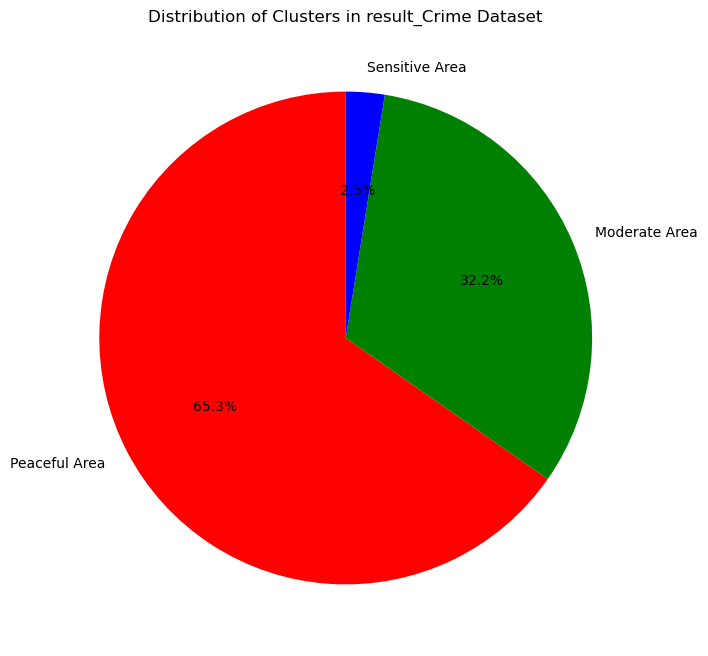

In [469]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_distribution, labels=cluster_distribution.index, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue'])
plt.title('Distribution of Clusters in result_Crime Dataset')
plt.show()

# 4.2  Create DataFrame for each cluster that shows data according to the areas.

In [449]:
# Merge the two datasets based on the 'State/UT' column
Merged_Area_Crime = pd.merge(result_Crime, Area_state, on='State/ UT', how='inner')

In [462]:
Merged_Area_Crime.head(2)

,State/ UT,District,Murder,Attempt To Murder,Culpable Homicide Not Amounting To Murder,Rape,Custodial Rape,Other Rape,Kidnapping & Abduction,Kidnapping And Abduction Of Women And Girls,...,Dowry Deaths,Assault On Women With Intent To Outrage Her Modesty,Insult To Modesty Of Women,Cruelty By Husband Or His Relatives,Importation Of Girls From Foreign Countries,Causing Death By Negligence,Other Ipc Crimes,Cluster,Cluster_Name,State_Area
0,Andaman & Nicobar Island,A And N Islands,15,19,1,3,0,3,12,9,...,1,21,2,18,0,4,337,1,Peaceful Area,8249.0
1,Andaman & Nicobar Island,Andaman,118,41,18,92,0,92,73,61,...,3,168,37,97,0,32,3638,1,Peaceful Area,8249.0


In [451]:
Merged_Area_Crime=Merged_Area_Crime.drop(['Rank', 'Region','National share (%)'], axis=1)

In [453]:
# Rename the 'Area (km2)' column to 'State_Area'
Merged_Area_Crime = Merged_Area_Crime.rename(columns={'Area (km2)': 'State_Area'})

# Create datasets for each cluster

In [458]:
# Create separate datasets for each cluster
Sensitive_area_data = Merged_Area_Crime[Merged_Area_Crime['Cluster_Name'] == 'Sensitive Area']
Moderate_area_data = Merged_Area_Crime[Merged_Area_Crime['Cluster_Name'] == 'Moderate Area']
Peaceful_area_data = Merged_Area_Crime[Merged_Area_Crime['Cluster_Name'] == 'Peaceful Area']

# Display the first few rows of each dataset
print("Sensitive Area Data:")
print(Sensitive_area_data.head())

print("\nModerate Area Data:")
print(Moderate_area_data.head())

print("\nPeaceful Area Data:")
print(Peaceful_area_data.head())

Sensitive Area Data:
          State/ UT          District  Murder  Attempt To Murder  \
10   Andhra Pradesh         Cyberabad    1810                914   
15   Andhra Pradesh    Hyderabad City    1455               1563   
121           Bihar             Patna    4586               2845   
184           Delhi             South     713                576   
193         Gujarat  Ahmedabad Commr.    1204                778   

     Culpable Homicide Not Amounting To Murder  Rape  Custodial Rape  \
10                                          96   641               0   
15                                          65   712               0   
121                                        301   572               0   
184                                         88   839               0   
193                                        101   506               0   

     Other Rape  Kidnapping & Abduction  \
10          641                    1398   
15          712                    1466   
121     

In [459]:
# Save each dataset to a new CSV file if needed
Sensitive_area_data.to_csv("C:\\Users\\BHAVITH\\OneDrive\\Desktop\\Capstone project\\Working file\\ML crime data\\India_Crime - Copy\\sensitive_area_data.csv",index=False) 
Moderate_area_data.to_csv("C:\\Users\\BHAVITH\\OneDrive\\Desktop\\Capstone project\\Working file\\ML crime data\\India_Crime - Copy\\moderate_area_data.csv", index=False)
Peaceful_area_data.to_csv("C:\\Users\\BHAVITH\\OneDrive\\Desktop\\Capstone project\\Working file\\ML crime data\\India_Crime - Copy\\peaceful_area_data.csv", index=False)

In [471]:
Sensitive_area_data.head(3)

,State/ UT,District,Murder,Attempt To Murder,Culpable Homicide Not Amounting To Murder,Rape,Custodial Rape,Other Rape,Kidnapping & Abduction,Kidnapping And Abduction Of Women And Girls,...,Dowry Deaths,Assault On Women With Intent To Outrage Her Modesty,Insult To Modesty Of Women,Cruelty By Husband Or His Relatives,Importation Of Girls From Foreign Countries,Causing Death By Negligence,Other Ipc Crimes,Cluster,Cluster_Name,State_Area
10,Andhra Pradesh,Cyberabad,1810,914,96,641,0,641,1398,857,...,437,1372,3168,8932,4,10314,23701,2,Sensitive Area,162975.0
15,Andhra Pradesh,Hyderabad City,1455,1563,65,712,0,712,1466,690,...,397,2088,1741,14055,2,5966,28465,2,Sensitive Area,162975.0
121,Bihar,Patna,4586,2845,301,572,0,572,3502,1169,...,1012,287,14,2838,39,4618,70387,2,Sensitive Area,94163.0


In [607]:
Moderate_area_data.head(3)

,State/ UT,District,Murder,Attempt To Murder,Culpable Homicide Not Amounting To Murder,Rape,Custodial Rape,Other Rape,Kidnapping & Abduction,Kidnapping And Abduction Of Women And Girls,...,Dowry Deaths,Assault On Women With Intent To Outrage Her Modesty,Insult To Modesty Of Women,Cruelty By Husband Or His Relatives,Importation Of Girls From Foreign Countries,Causing Death By Negligence,Other Ipc Crimes,Cluster,Cluster_Name,State_Area
6,Andhra Pradesh,Adilabad,1186,869,151,672,0,672,754,570,...,188,1785,1242,4126,0,3593,20579,0,Moderate Area,162975.0
7,Andhra Pradesh,Anantapur,1922,1248,51,266,0,266,839,554,...,174,2026,622,1645,0,5058,15861,0,Moderate Area,162975.0
8,Andhra Pradesh,Chittoor,1270,739,32,368,0,368,907,531,...,262,1381,2179,3283,0,8168,24575,0,Moderate Area,162975.0


In [623]:
Peaceful_area_data.head(3)

,State/ UT,District,Murder,Attempt To Murder,Culpable Homicide Not Amounting To Murder,Rape,Custodial Rape,Other Rape,Kidnapping & Abduction,Kidnapping And Abduction Of Women And Girls,...,Assault On Women With Intent To Outrage Her Modesty,Insult To Modesty Of Women,Cruelty By Husband Or His Relatives,Importation Of Girls From Foreign Countries,Causing Death By Negligence,Other Ipc Crimes,Cluster,Cluster_Name,State_Area,Total crime
0,Andaman & Nicobar Island,A And N Islands,15,19,1,3,0,3,12,9,...,21,2,18,0,4,337,1,Peaceful Area,8249.0,934
1,Andaman & Nicobar Island,Andaman,118,41,18,92,0,92,73,61,...,168,37,97,0,32,3638,1,Peaceful Area,8249.0,8460
2,Andaman & Nicobar Island,Car,2,0,0,0,0,0,1,1,...,1,0,0,0,1,8,1,Peaceful Area,8249.0,29


In [608]:
Peaceful_area_data = Peaceful_area_data.drop(columns=['Total Crimes'])

In [616]:
Peaceful_area_data.columns

Index(['State/ UT', 'District', 'Murder', 'Attempt To Murder',
       'Culpable Homicide Not Amounting To Murder', 'Rape', 'Custodial Rape',
       'Other Rape', 'Kidnapping & Abduction',
       'Kidnapping And Abduction Of Women And Girls',
       'Kidnapping And Abduction Of Others', 'Dacoity',
       'Preparation And Assembly For Dacoity', 'Robbery', 'Burglary', 'Theft',
       'Auto Theft', 'Other Theft', 'Riots', 'Criminal Breach Of Trust',
       'Cheating', 'Counterfieting', 'Arson', 'Hurt/Grevious Hurt',
       'Dowry Deaths', 'Assault On Women With Intent To Outrage Her Modesty',
       'Insult To Modesty Of Women', 'Cruelty By Husband Or His Relatives',
       'Importation Of Girls From Foreign Countries',
       'Causing Death By Negligence', 'Other Ipc Crimes', 'Cluster',
       'Cluster_Name', 'State_Area'],
      dtype='object')

In [621]:
Peaceful_area_data['Total crime']=Peaceful_area_data['Murder']+Peaceful_area_data['Attempt To Murder']+Peaceful_area_data['Culpable Homicide Not Amounting To Murder']+Peaceful_area_data['Rape']+Peaceful_area_data['Custodial Rape']+Peaceful_area_data['Other Rape']+Peaceful_area_data['Kidnapping & Abduction']+Peaceful_area_data['Kidnapping And Abduction Of Women And Girls']+Peaceful_area_data['Kidnapping And Abduction Of Others']+Peaceful_area_data['Dacoity']+Peaceful_area_data['Preparation And Assembly For Dacoity']+Peaceful_area_data['Robbery']+Peaceful_area_data['Burglary'] +Peaceful_area_data['Theft']+Peaceful_area_data['Auto Theft']+Peaceful_area_data['Other Theft']+Peaceful_area_data['Riots']+Peaceful_area_data['Criminal Breach Of Trust']+Peaceful_area_data['Cheating']+Peaceful_area_data['Counterfieting']+Peaceful_area_data['Arson']+Peaceful_area_data['Hurt/Grevious Hurt']+ Peaceful_area_data['Dowry Deaths']+Peaceful_area_data['Assault On Women With Intent To Outrage Her Modesty']+Peaceful_area_data['Insult To Modesty Of Women']+Peaceful_area_data['Cruelty By Husband Or His Relatives']+Peaceful_area_data['Importation Of Girls From Foreign Countries']+Peaceful_area_data['Causing Death By Negligence']+Peaceful_area_data['Other Ipc Crimes']


In [624]:
Peaceful_area_data.head(5)

,State/ UT,District,Murder,Attempt To Murder,Culpable Homicide Not Amounting To Murder,Rape,Custodial Rape,Other Rape,Kidnapping & Abduction,Kidnapping And Abduction Of Women And Girls,...,Assault On Women With Intent To Outrage Her Modesty,Insult To Modesty Of Women,Cruelty By Husband Or His Relatives,Importation Of Girls From Foreign Countries,Causing Death By Negligence,Other Ipc Crimes,Cluster,Cluster_Name,State_Area,Total crime
0,Andaman & Nicobar Island,A And N Islands,15,19,1,3,0,3,12,9,...,21,2,18,0,4,337,1,Peaceful Area,8249.0,934
1,Andaman & Nicobar Island,Andaman,118,41,18,92,0,92,73,61,...,168,37,97,0,32,3638,1,Peaceful Area,8249.0,8460
2,Andaman & Nicobar Island,Car,2,0,0,0,0,0,1,1,...,1,0,0,0,1,8,1,Peaceful Area,8249.0,29
3,Andaman & Nicobar Island,Nicobar,12,2,2,2,0,2,1,0,...,8,0,1,0,0,117,1,Peaceful Area,8249.0,261
4,Andaman & Nicobar Island,North,5,0,0,4,0,4,0,0,...,2,1,2,0,0,70,1,Peaceful Area,8249.0,132


Pivot Table for Total Crimes' (Ascending Order):
                                   Total crime
State/ UT        District                     
Jammu & Kashmir  Railways Katra              4
Manipur          Cid                         9
Tripura          G.R.P.                      9
Jammu & Kashmir  Railways Kmr               10
Himachal Pradesh Cid                        15
...                                        ...
Chandigarh       Chandigarh              60202
Uttar Pradesh    G.R.P.                  60912
Rajasthan        Jaipur East             61425
Tamil Nadu       Coimbatore Urban        63598
Kerala           Ernakulam Commr.       108666

[540 rows x 1 columns]


<Figure size 1200x800 with 0 Axes>

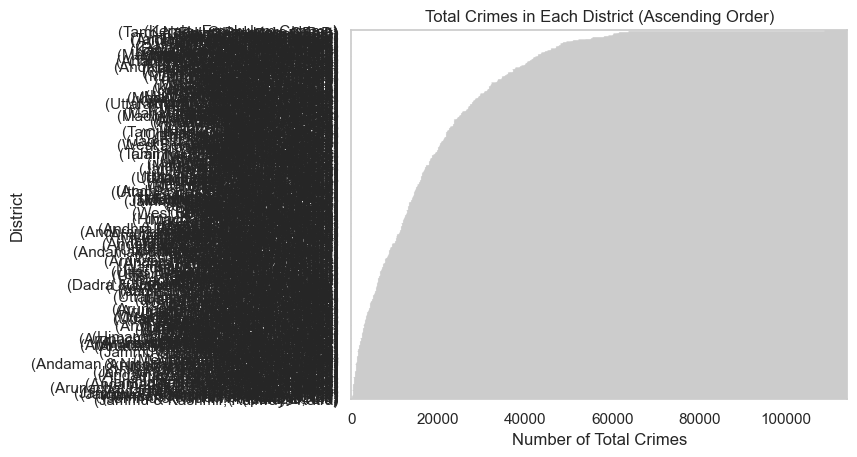

In [625]:
# Create a pivot table for 'Total crimes of Peaceful_area_data' column
pivot_table = pd.pivot_table(Peaceful_area_data, values='Total crime', index=['State/ UT', 'District'], aggfunc='sum')

# Sort the pivot table based on 'Total crimes of Peaceful_area_data' in ascending order
pivot_table = pivot_table.sort_values(by='Total crime', ascending=True)

# Print the result
print("Pivot Table for Total Crimes' (Ascending Order):")
print(pivot_table)


# Plotting the bar chart
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='barh', legend=False)
plt.title('Total Crimes in Each District (Ascending Order)')
plt.xlabel('Number of Total Crimes')
plt.ylabel('District')
plt.show()

In [627]:
pivot_table.tail()

,,Total crime
State/ UT,District,
Chandigarh,Chandigarh,60202
Uttar Pradesh,G.R.P.,60912
Rajasthan,Jaipur East,61425
Tamil Nadu,Coimbatore Urban,63598
Kerala,Ernakulam Commr.,108666


# 4.3 "Analyse your clusters and prepare a report that explains all your observations.

# Sensitive_area_data : Analysis

In [593]:
Sensitive_area_data.head(3)

,State/ UT,District,Murder,Attempt To Murder,Culpable Homicide Not Amounting To Murder,Rape,Custodial Rape,Other Rape,Kidnapping & Abduction,Kidnapping And Abduction Of Women And Girls,...,Assault On Women With Intent To Outrage Her Modesty,Insult To Modesty Of Women,Cruelty By Husband Or His Relatives,Importation Of Girls From Foreign Countries,Causing Death By Negligence,Other Ipc Crimes,Cluster,Cluster_Name,State_Area,Total Crimes
10,Andhra Pradesh,Cyberabad,1810,914,96,641,0,641,1398,857,...,1372,3168,8932,4,10314,23701,2,Sensitive Area,162975.0,336424.0
15,Andhra Pradesh,Hyderabad City,1455,1563,65,712,0,712,1466,690,...,2088,1741,14055,2,5966,28465,2,Sensitive Area,162975.0,424253.0
121,Bihar,Patna,4586,2845,301,572,0,572,3502,1169,...,287,14,2838,39,4618,70387,2,Sensitive Area,94163.0,269723.0


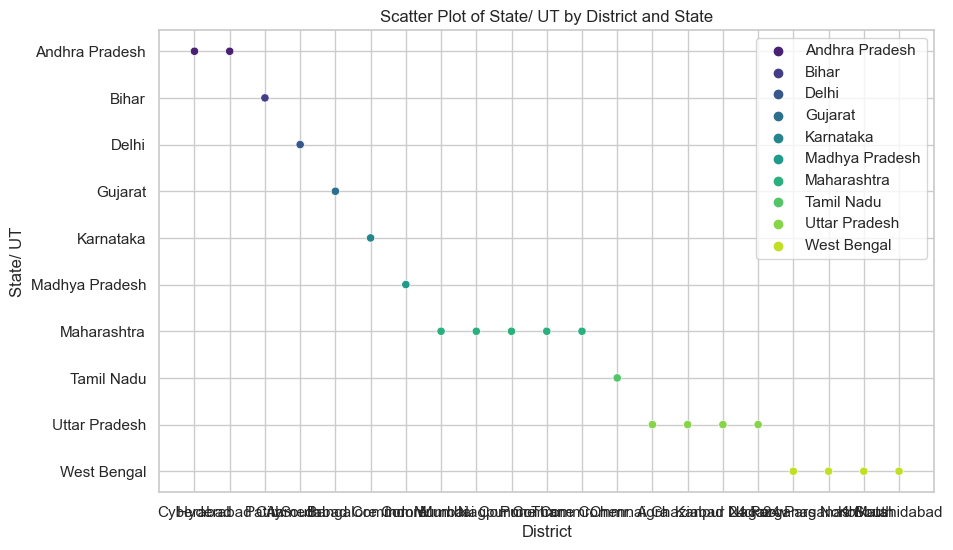

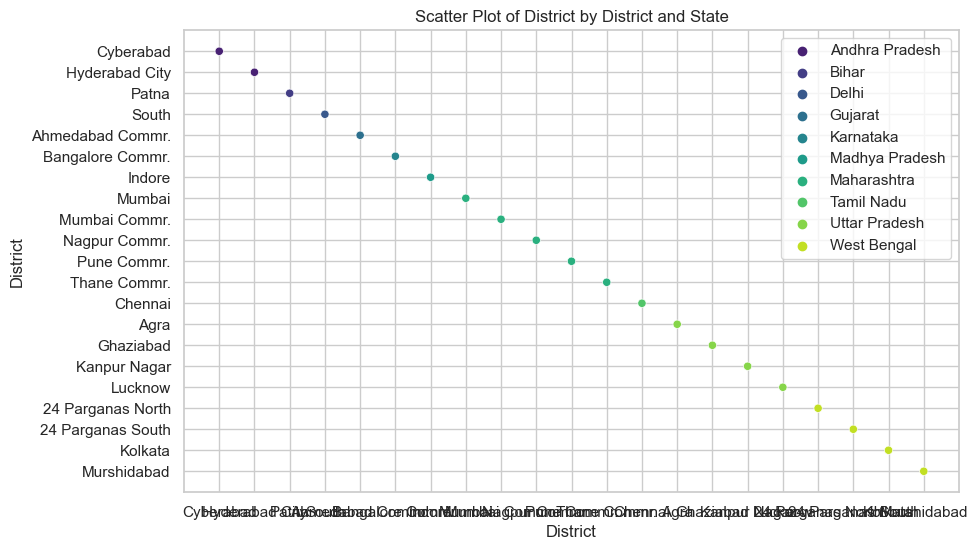

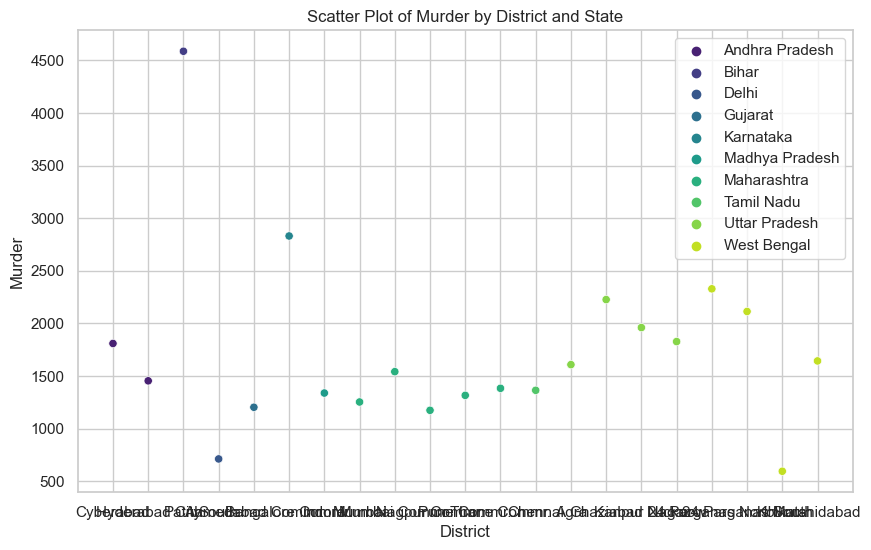

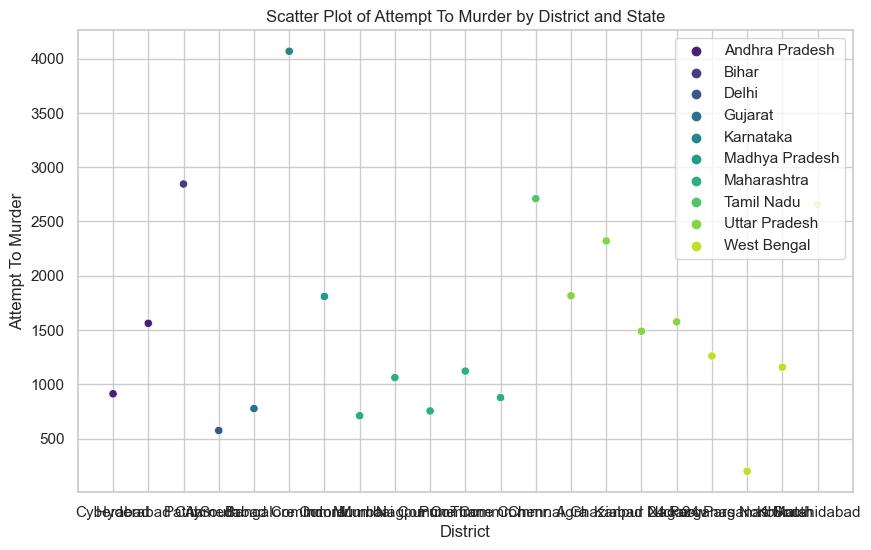

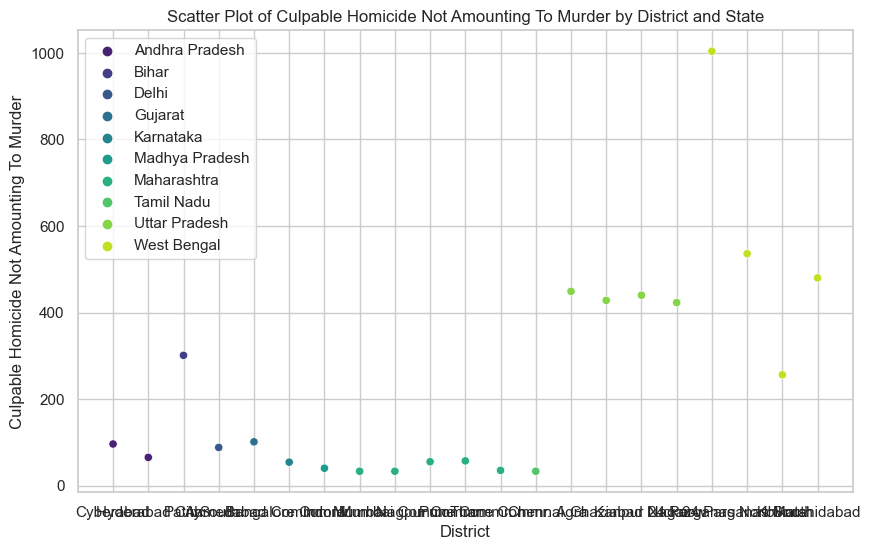

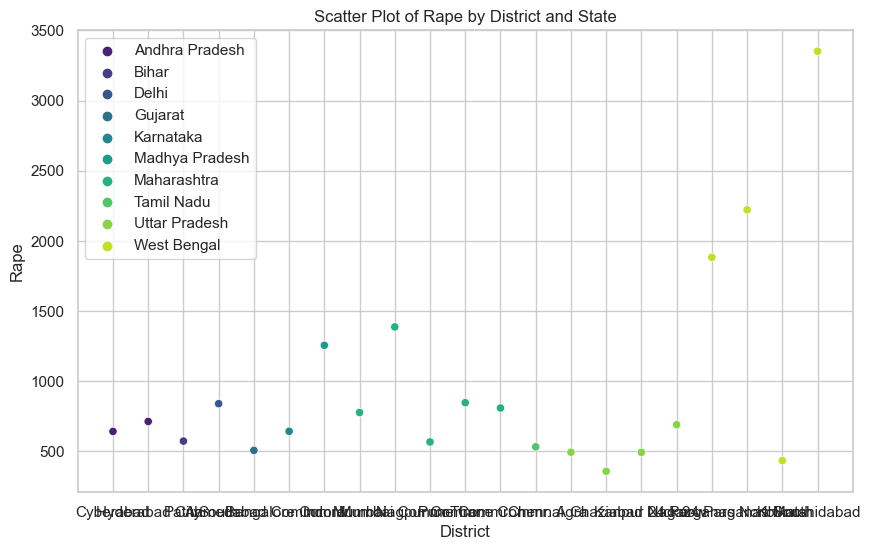

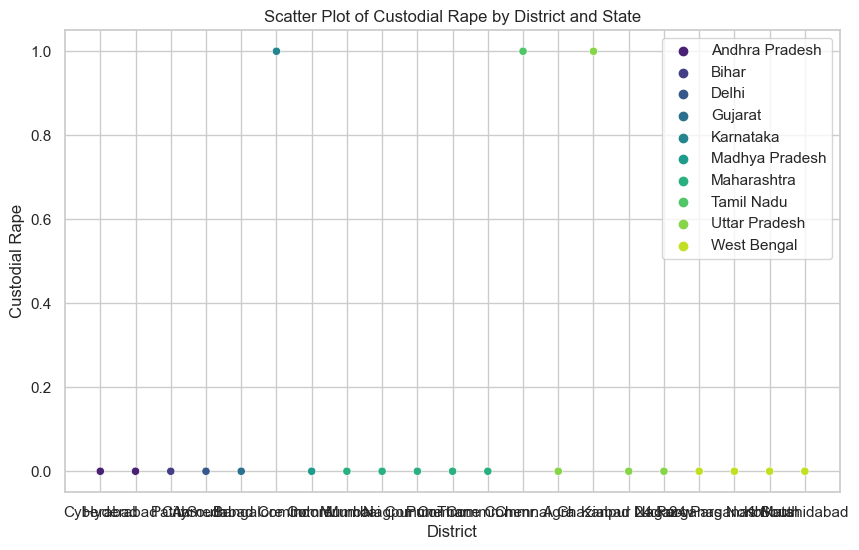

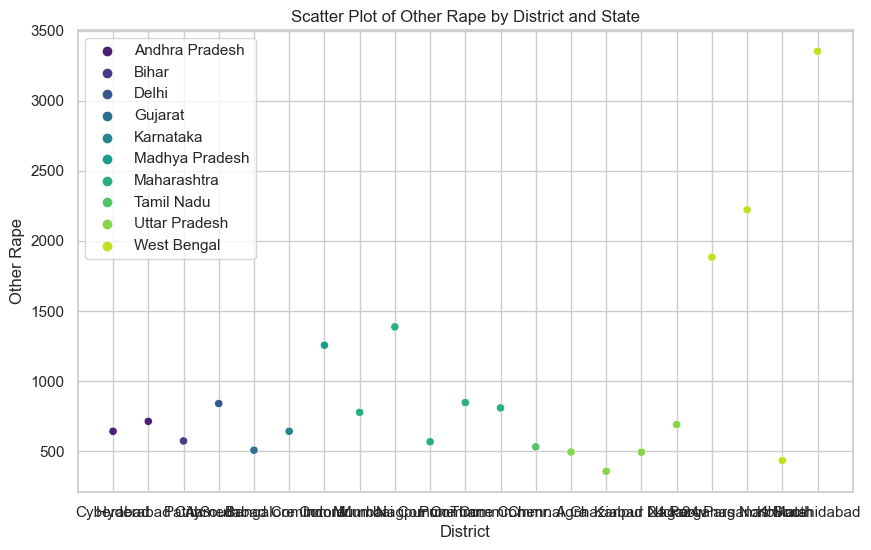

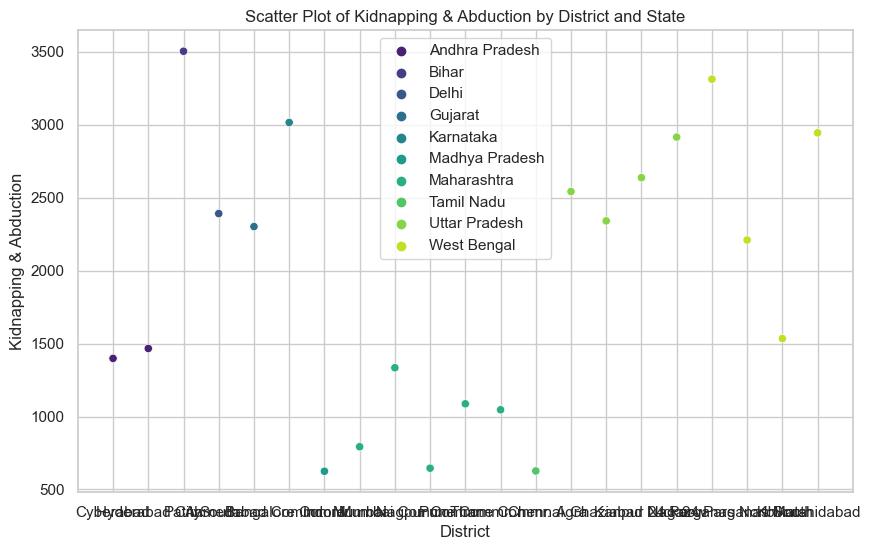

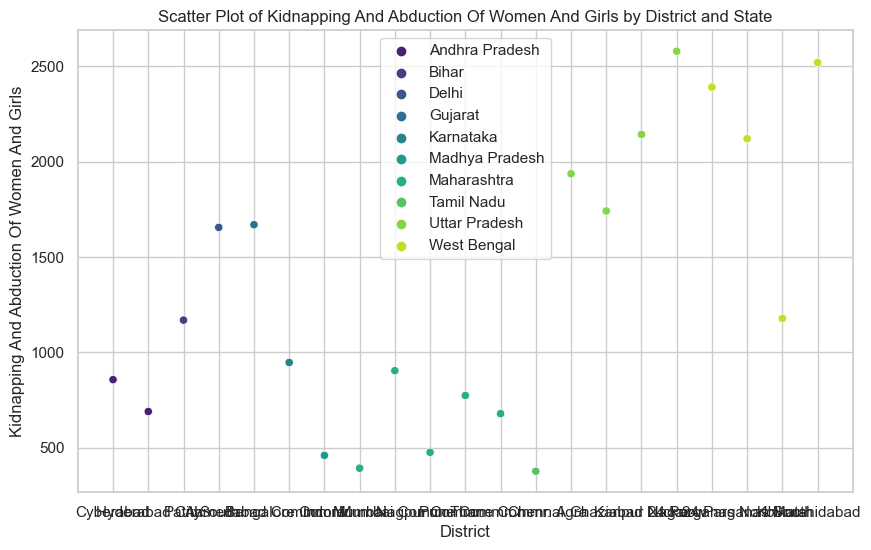

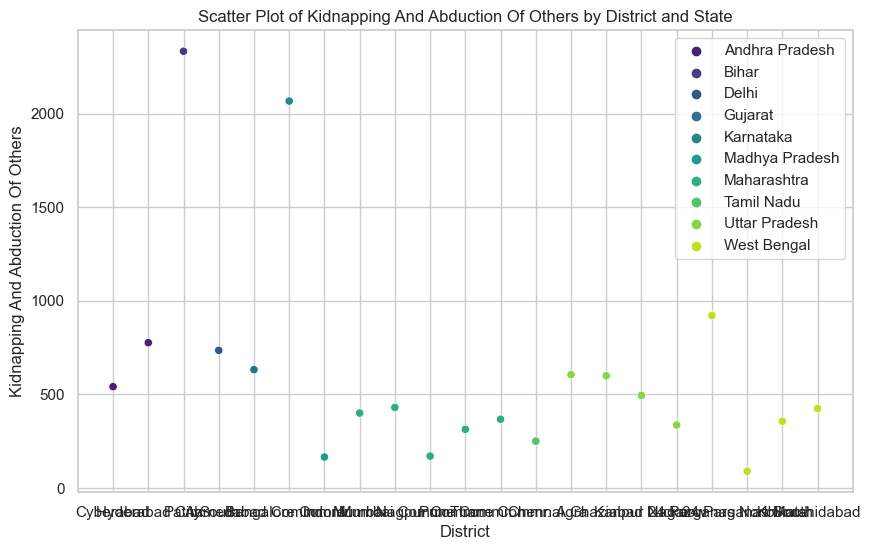

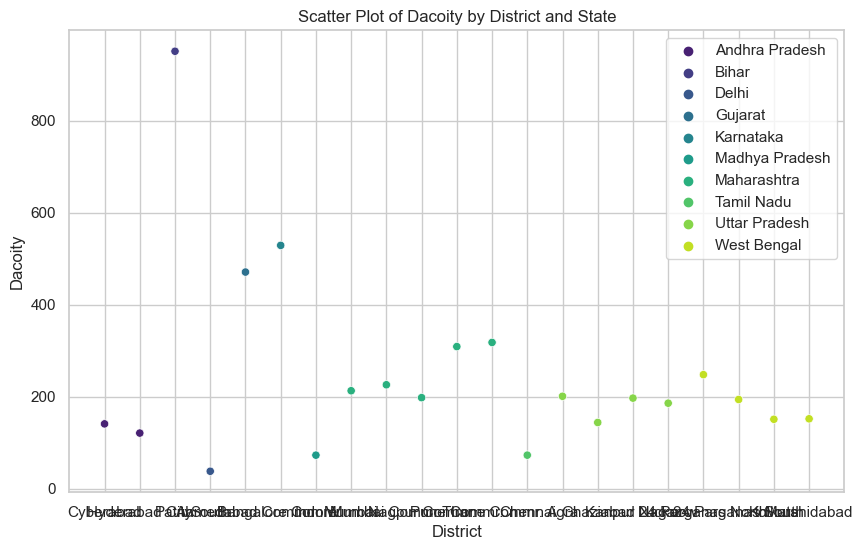

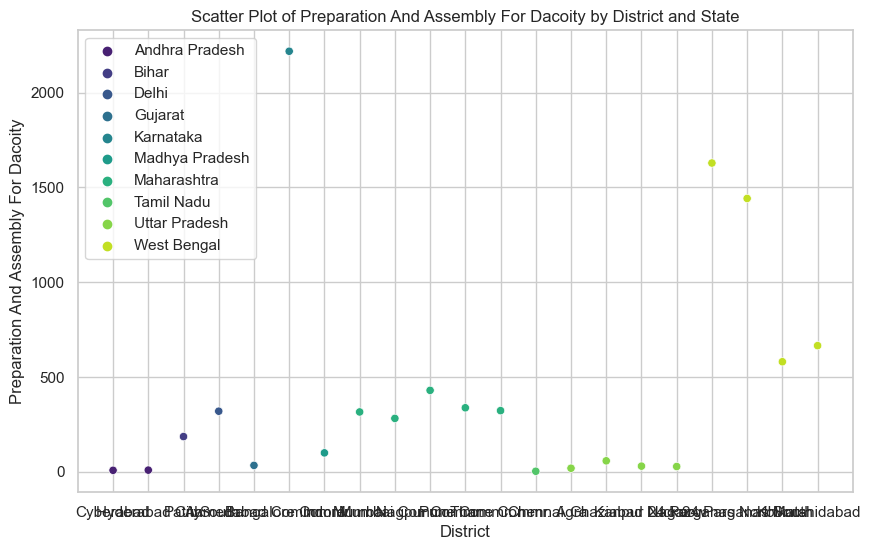

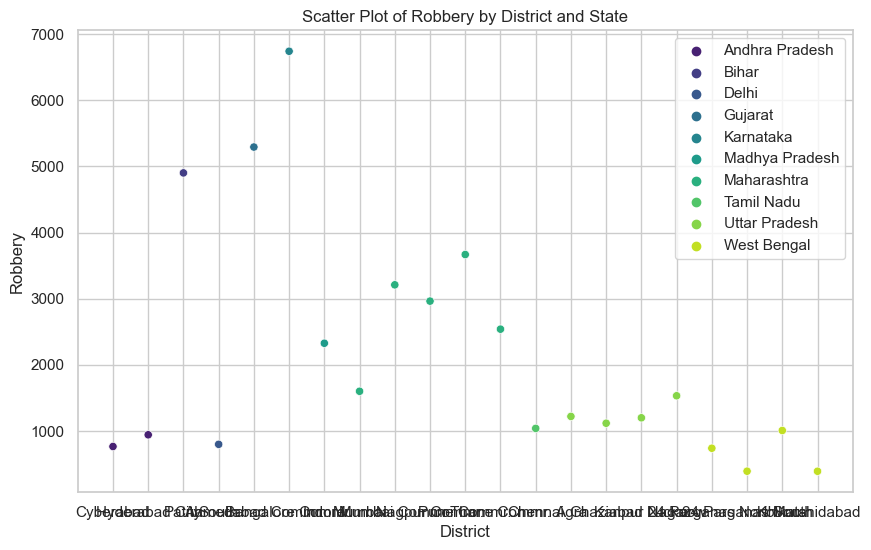

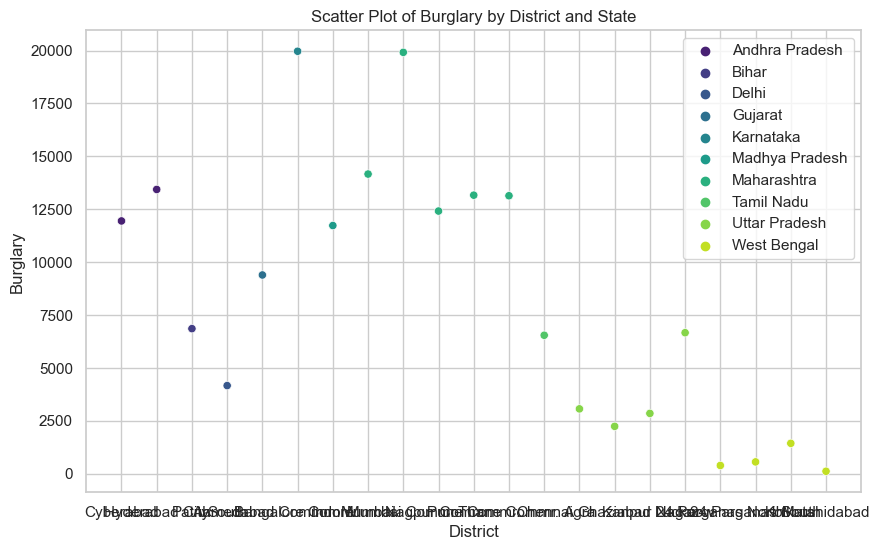

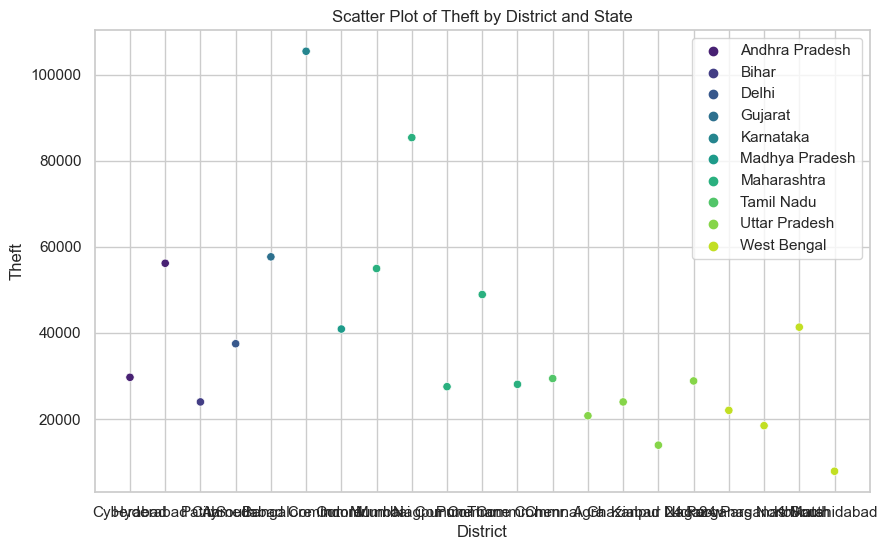

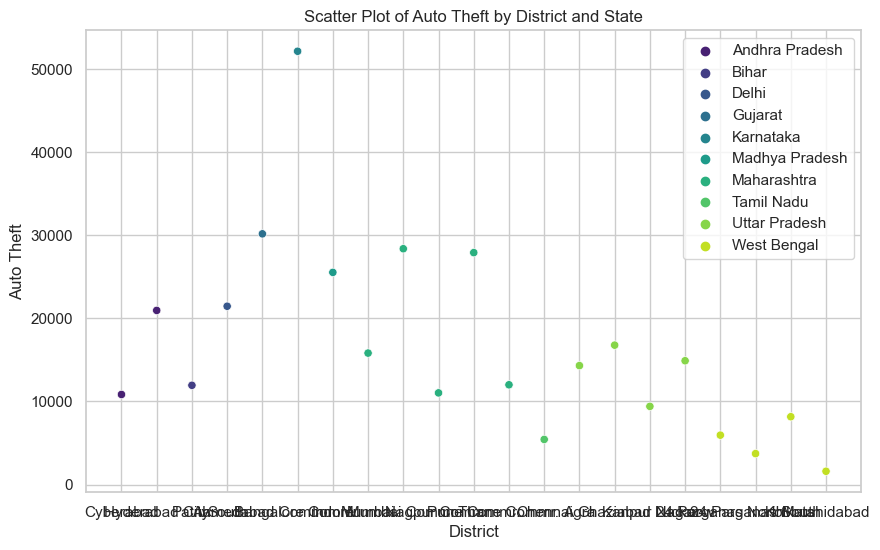

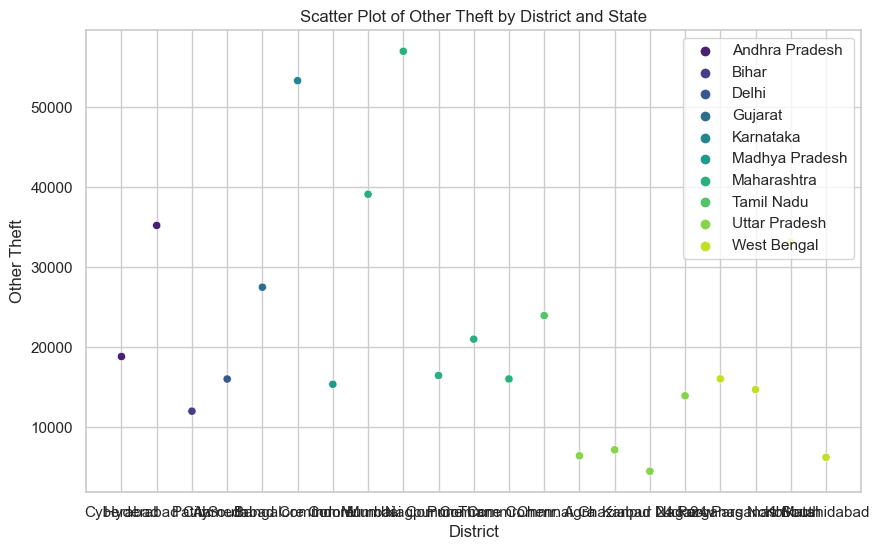

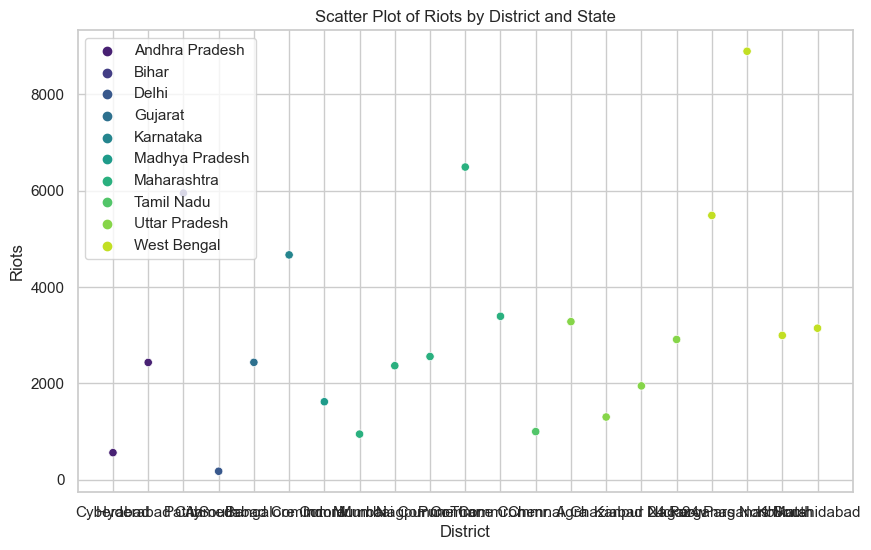

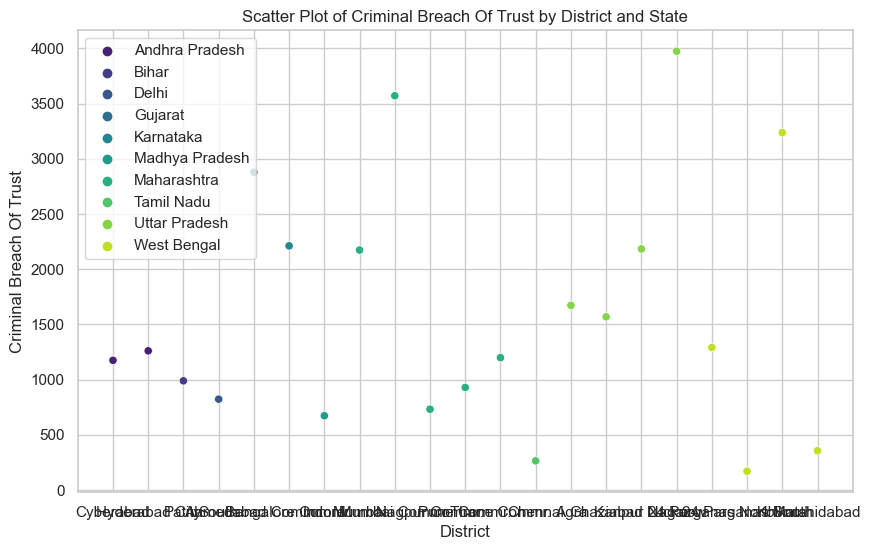

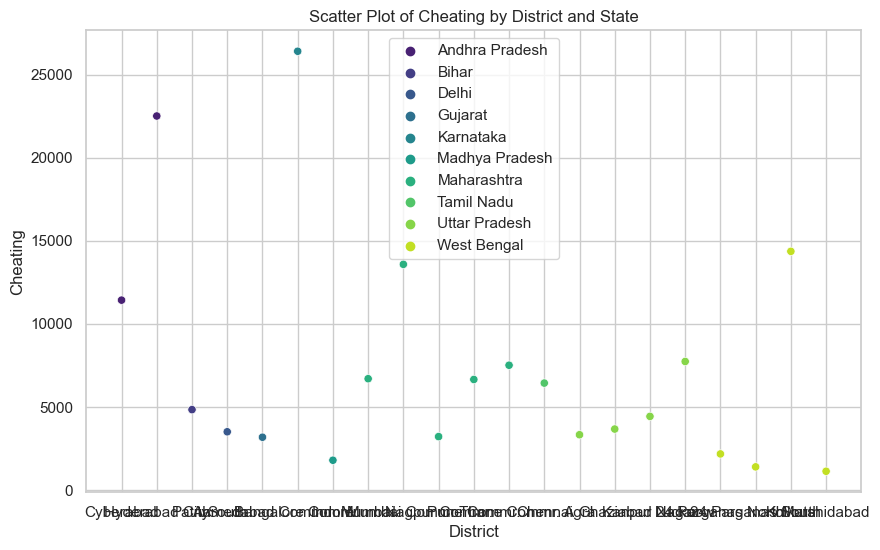

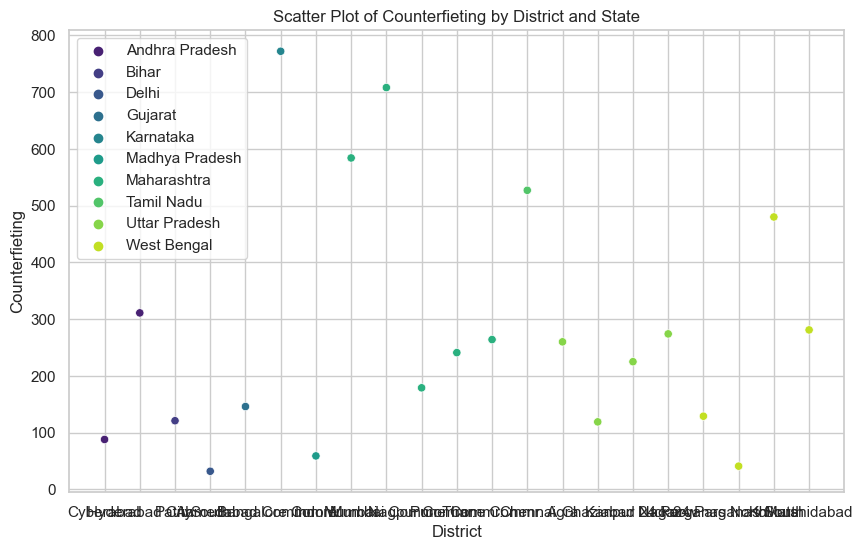

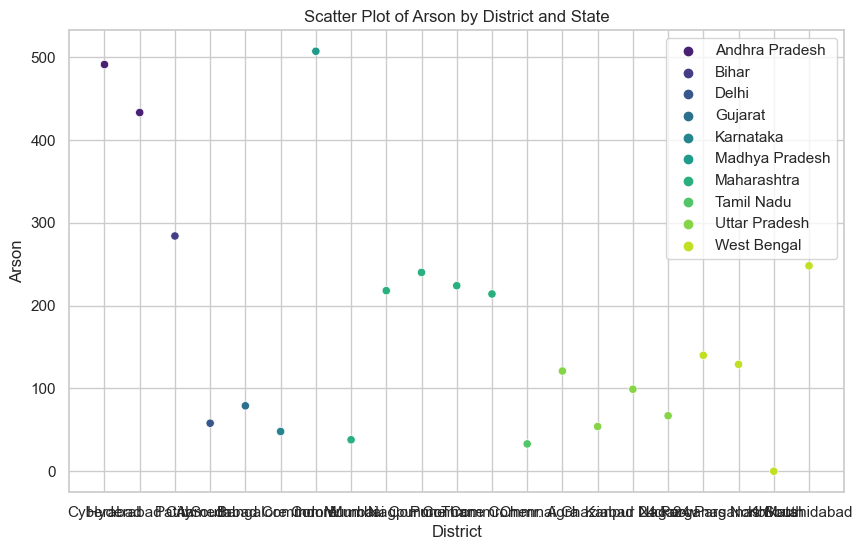

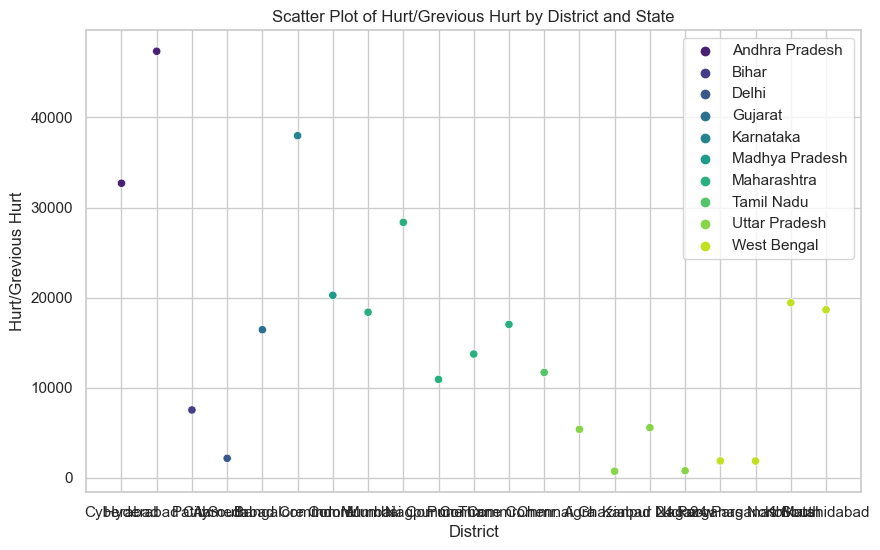

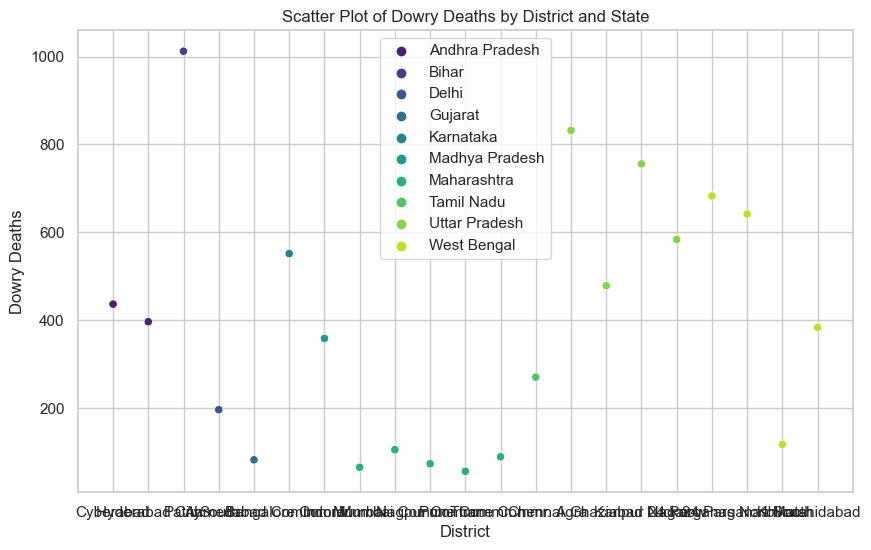

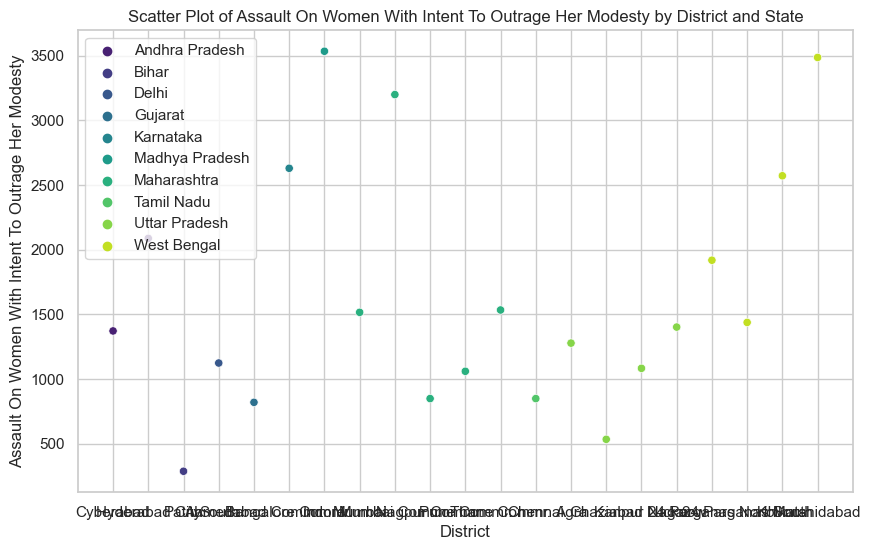

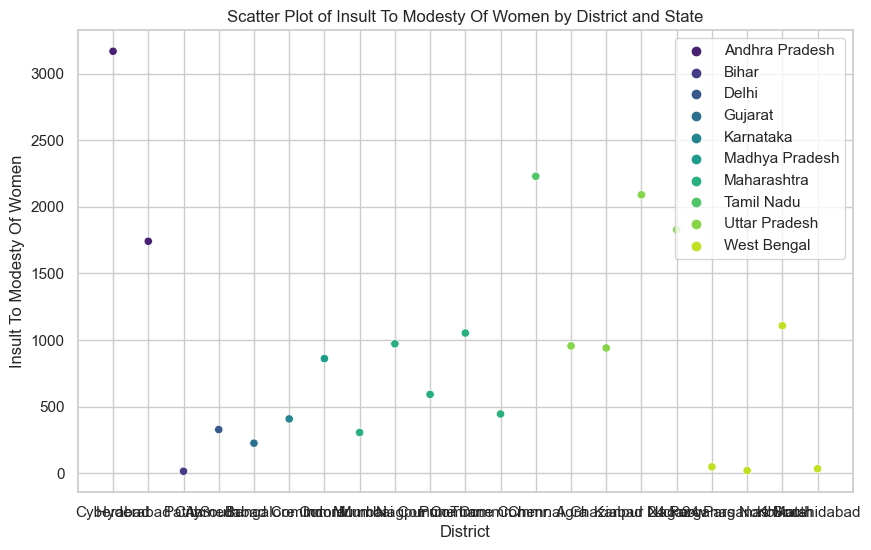

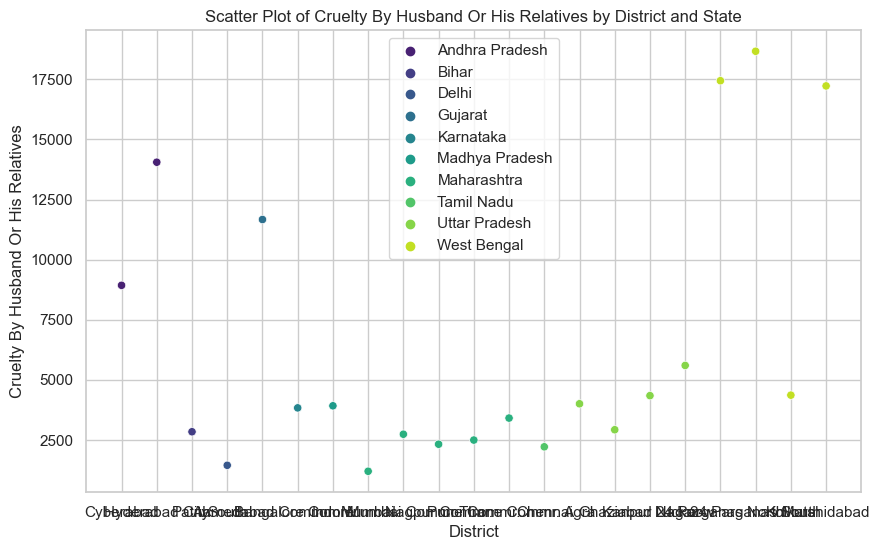

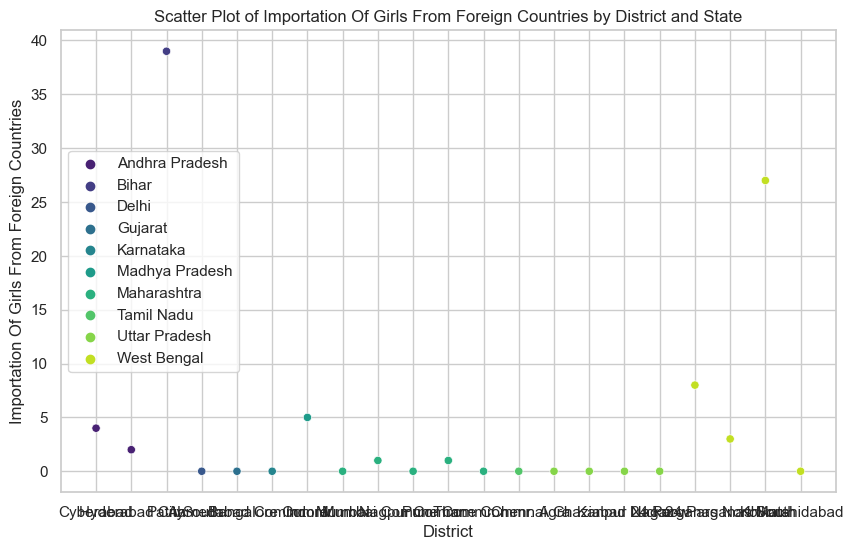

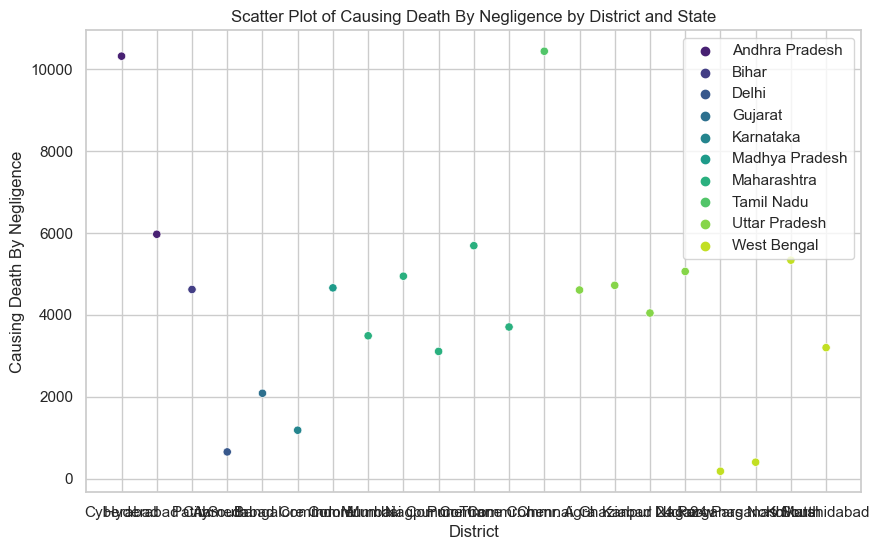

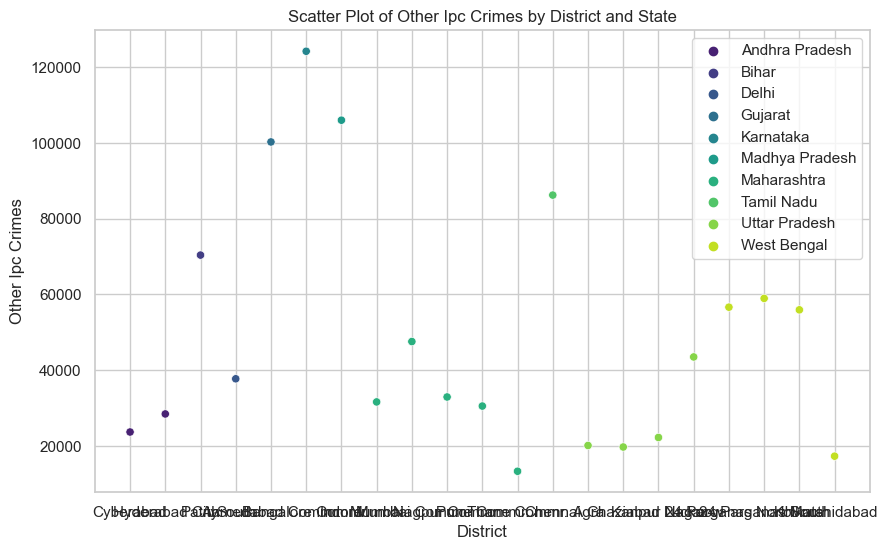

In [594]:
features_to_visualize = ['State/ UT', 'District','Murder', 'Attempt To Murder',
       'Culpable Homicide Not Amounting To Murder', 'Rape', 'Custodial Rape',
       'Other Rape', 'Kidnapping & Abduction',
       'Kidnapping And Abduction Of Women And Girls',
       'Kidnapping And Abduction Of Others', 'Dacoity',
       'Preparation And Assembly For Dacoity', 'Robbery', 'Burglary', 'Theft',
       'Auto Theft', 'Other Theft', 'Riots', 'Criminal Breach Of Trust',
       'Cheating', 'Counterfieting', 'Arson', 'Hurt/Grevious Hurt',
       'Dowry Deaths', 'Assault On Women With Intent To Outrage Her Modesty',
       'Insult To Modesty Of Women', 'Cruelty By Husband Or His Relatives',
       'Importation Of Girls From Foreign Countries',
       'Causing Death By Negligence', 'Other Ipc Crimes']

# Scatter Plots
for feature in features_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=Sensitive_area_data, x='District', y=feature, hue='State/ UT', palette='viridis')
    plt.title(f'Scatter Plot of {feature} by District and State')
    plt.xlabel('District')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

In [595]:
Sensitive_District = pd.read_csv('sensitive_area_data_V1.csv')
Sensitive_District.head(2)

,State/ UT,District,Murder,Attempt To Murder,Culpable Homicide Not Amounting To Murder,Rape,Custodial Rape,Other Rape,Kidnapping & Abduction,Kidnapping And Abduction Of Women And Girls,...,Assault On Women With Intent To Outrage Her Modesty,Insult To Modesty Of Women,Cruelty By Husband Or His Relatives,Importation Of Girls From Foreign Countries,Causing Death By Negligence,Other Ipc Crimes,Total Crimes,Cluster,Cluster_Name,State_Area
0,Andhra Pradesh,Cyberabad,1810,914,96,641,0,641,1398,857,...,1372,3168,8932,4,10314,23701,173447,2,Sensitive Area,162975
1,Andhra Pradesh,Hyderabad City,1455,1563,65,712,0,712,1466,690,...,2088,1741,14055,2,5966,28465,261276,2,Sensitive Area,162975


# Murder counts

Pivot Table for Murder (Ascending Order):
                                  Murder
State/ UT      District                 
West Bengal    Kolkata               596
Delhi          South                 713
Maharashtra    Nagpur Commr.        1175
Gujarat        Ahmedabad Commr.     1204
Maharashtra    Mumbai               1254
               Pune Commr.          1317
Madhya Pradesh Indore               1339
Tamil Nadu     Chennai              1365
Maharashtra    Thane Commr.         1384
Andhra Pradesh Hyderabad City       1455
Maharashtra    Mumbai Commr.        1542
Uttar Pradesh  Agra                 1609
West Bengal    Murshidabad          1644
Andhra Pradesh Cyberabad            1810
Uttar Pradesh  Lucknow              1828
               Kanpur Nagar         1961
West Bengal    24 Parganas South    2114
Uttar Pradesh  Ghaziabad            2227
West Bengal    24 Parganas North    2329
Karnataka      Bangalore Commr.     2831
Bihar          Patna                4586


<Figure size 1200x800 with 0 Axes>

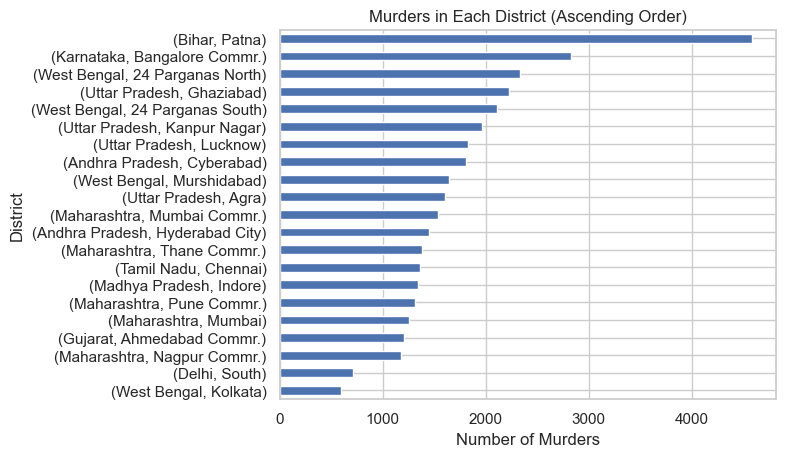

In [596]:
# Calculate total crimes for each district
Sensitive_District['Total Crimes'] = Sensitive_District[crime_columns].sum(axis=1)

# Create a pivot table for 'Murder' column
pivot_table = pd.pivot_table(Sensitive_District, values='Murder', index=['State/ UT', 'District'], aggfunc='sum')

# Sort the pivot table based on 'Murder' in ascending order
pivot_table = pivot_table.sort_values(by='Murder', ascending=True)

# Print the result
print("Pivot Table for Murder (Ascending Order):")
print(pivot_table)


# Plotting the bar chart
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='barh', legend=False)
plt.title('Murders in Each District (Ascending Order)')
plt.xlabel('Number of Murders')
plt.ylabel('District')
plt.show()

Observation: 
The top 4 states and 7 districts with the highest number of Murder cases are Karnataka (Bangalore Commissionerate), West Bengal (24 Parganas North and 24 Parganas South), Uttar Pradesh (Ghaziabad and Lucknow), and Andhra Pradesh (Hyderabad) so theses are unsafe districts.

The top 5 states and 5 districts with the low number of Murder cases are , West Bengal (Kolkata), Delhi (South),Maharashtra    (Nagpur Commr),Gujarat (Ahmedabad Commr),Maharashtra(Mumbai )so theses are Most safe districts

# Rape

Pivot Table for Rape (Ascending Order):
                                  Rape
State/ UT      District               
Uttar Pradesh  Ghaziabad           357
West Bengal    Kolkata             433
Uttar Pradesh  Kanpur Nagar        492
               Agra                493
Gujarat        Ahmedabad Commr.    506
Tamil Nadu     Chennai             531
Maharashtra    Nagpur Commr.       566
Bihar          Patna               572
Andhra Pradesh Cyberabad           641
Karnataka      Bangalore Commr.    642
Uttar Pradesh  Lucknow             689
Andhra Pradesh Hyderabad City      712
Maharashtra    Mumbai              776
               Thane Commr.        808
Delhi          South               839
Maharashtra    Pune Commr.         846
Madhya Pradesh Indore             1255
Maharashtra    Mumbai Commr.      1386
West Bengal    24 Parganas North  1883
               24 Parganas South  2221
               Murshidabad        3352


<Figure size 1200x800 with 0 Axes>

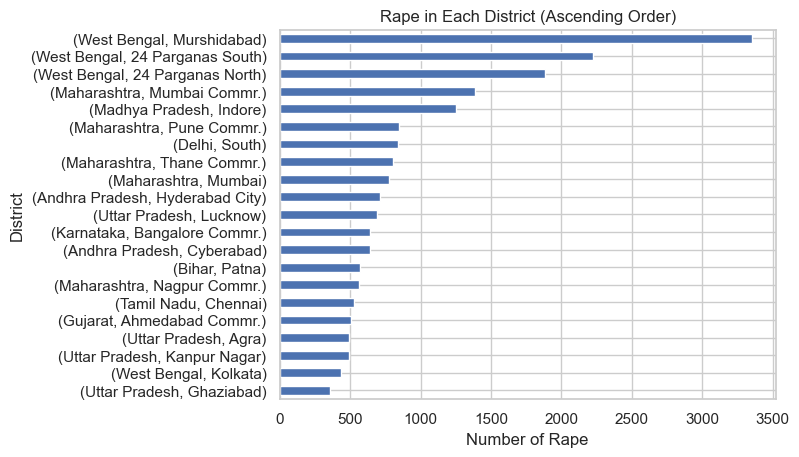

In [597]:
# Calculate total crimes for each district
#Sensitive_District['Total Crimes'] = Sensitive_District[crime_columns].sum(axis=1)

# Create a pivot table for 'Rape' column
pivot_table = pd.pivot_table(Sensitive_District, values='Rape', index=['State/ UT', 'District'], aggfunc='sum')

# Sort the pivot table based on 'Rape' in ascending order
pivot_table = pivot_table.sort_values(by='Rape', ascending=True)

# Print the result
print("Pivot Table for Rape (Ascending Order):")
print(pivot_table)


# Plotting the bar chart
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='barh', legend=False)
plt.title('Rape in Each District (Ascending Order)')
plt.xlabel('Number of Rape')
plt.ylabel('District')
plt.show()

Observation: The top states and districts with the highest number of Rape cases are (Maharashtra(Mumbai Commr), West Bengal (24 Parganas North and 24 Parganas South,Murshidabad), Madhya Pradesh (Indore),Maharashtra (Pune Commr.)  so theses are unsafe districts.

The top 5 states and 5 districts with the least number of Rape cases are Uttar Pradesh (Ghaziabad),West Bengal (Kolkata) ,Uttar Pradesh(Kanpur Nagar), Gujarat(Ahmedabad Commr),Tamil Nadu (Chennai) so theses are Most safe districts

# Kidnapping & Abduction

Pivot Table for Kidnapping & Abduction' (Ascending Order):
                                  Kidnapping & Abduction
State/ UT      District                                 
Madhya Pradesh Indore                                625
Tamil Nadu     Chennai                               627
Maharashtra    Nagpur Commr.                         646
               Mumbai                                793
               Thane Commr.                         1046
               Pune Commr.                          1087
               Mumbai Commr.                        1334
Andhra Pradesh Cyberabad                            1398
               Hyderabad City                       1466
West Bengal    Kolkata                              1534
               24 Parganas South                    2209
Gujarat        Ahmedabad Commr.                     2301
Uttar Pradesh  Ghaziabad                            2340
Delhi          South                                2390
Uttar Pradesh  Agra          

<Figure size 1200x800 with 0 Axes>

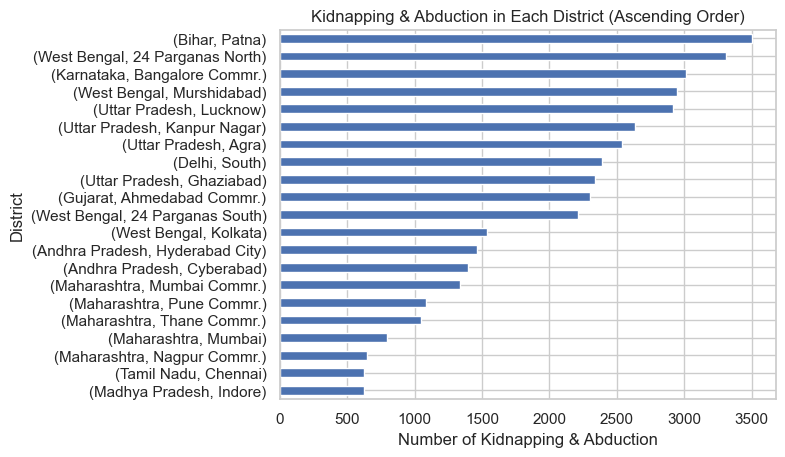

In [602]:
# Create a pivot table for 'Kidnapping & Abduction' column
pivot_table = pd.pivot_table(Sensitive_District, values='Kidnapping & Abduction', index=['State/ UT', 'District'], aggfunc='sum')

# Sort the pivot table based on 'Kidnapping & Abduction' in ascending order
pivot_table = pivot_table.sort_values(by='Kidnapping & Abduction', ascending=True)

# Print the result
print("Pivot Table for Kidnapping & Abduction' (Ascending Order):")
print(pivot_table)


# Plotting the bar chart
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='barh', legend=False)
plt.title('Kidnapping & Abduction in Each District (Ascending Order)')
plt.xlabel('Number of Kidnapping & Abduction')
plt.ylabel('District')
plt.show()

Observation: The top states and districts with the highest number of Kidnapping & Abduction cases are in Bihar( Patna),West Bengal (24 Parganas North, Murshidabad )Karnataka(Bangalore Commr),Uttar Pradesh  Agra ,Kanpur Nagar ,Lucknow ) Delhi(South )so theses are unsafe districts.

The top 5 states and districts with the least number of Kidnapping & Abduction cases are in Madhya Pradesh(Indore),Tamil Nadu  Chennai Tamil Nadu(Chennai),Maharashtra(Nagpur Commr,Mumbai,Thane Commr,Pune Commr,Mumbai Commr),Andhra Pradesh (Hyberabad)so theses are Most safe districts

# Robbery

Pivot Table for Robbery' (Ascending Order):
                                  Robbery
State/ UT      District                  
West Bengal    Murshidabad            391
               24 Parganas South      392
               24 Parganas North      739
Andhra Pradesh Cyberabad              765
Delhi          South                  798
Andhra Pradesh Hyderabad City         942
West Bengal    Kolkata               1007
Tamil Nadu     Chennai               1039
Uttar Pradesh  Ghaziabad             1117
               Kanpur Nagar          1199
               Agra                  1220
               Lucknow               1532
Maharashtra    Mumbai                1600
Madhya Pradesh Indore                2326
Maharashtra    Thane Commr.          2539
               Nagpur Commr.         2963
               Mumbai Commr.         3209
               Pune Commr.           3667
Bihar          Patna                 4901
Gujarat        Ahmedabad Commr.      5292
Karnataka      Bangalore Commr. 

<Figure size 1200x800 with 0 Axes>

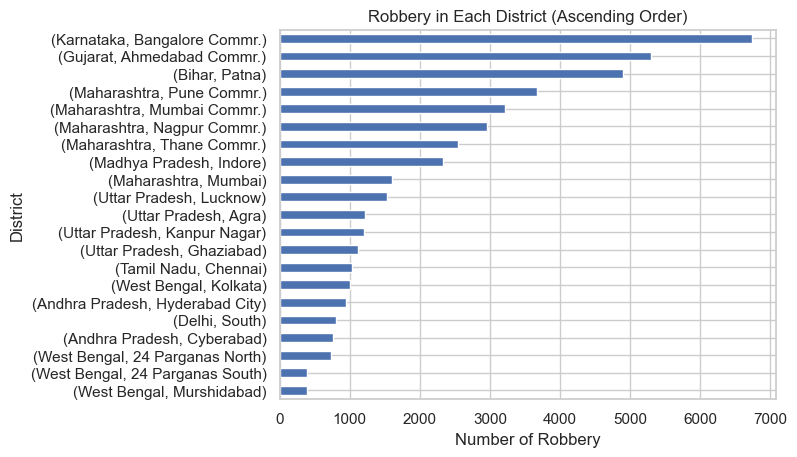

In [603]:
# Create a pivot table for 'Robbery' column
pivot_table = pd.pivot_table(Sensitive_District, values='Robbery', index=['State/ UT', 'District'], aggfunc='sum')

# Sort the pivot table based on 'Robbery' in ascending order
pivot_table = pivot_table.sort_values(by='Robbery', ascending=True)

# Print the result
print("Pivot Table for Robbery' (Ascending Order):")
print(pivot_table)


# Plotting the bar chart
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='barh', legend=False)
plt.title('Robbery in Each District (Ascending Order)')
plt.xlabel('Number of Robbery')
plt.ylabel('District')
plt.show()

Observation: 
    The top 5 states and districts with the highest number of Robbery cases are in Karnataka(Bangalore Commr),Gujarat(Ahmedabad Commr) Bihar(Patna) , Maharashtra(Thane Commr,Nagpur Commr,Mumbai Commr,Pune Commr),Madhya Pradesh(Indore), Maharashtra Mumbai)so theses are unsafe districts.

The top 5 states and districts with the least number of Robbery cases are in West Bengal(Murshidabad,24 Parganas South),Andhra Pradesh (Cyberabad),Delhi(South),Andhra Pradesh (Hyderabad City),West Bengal(Kolkata) so theses are Most safe districts

# Sensitive_area_data total crimes each districts

Pivot Table for Total Crimes' (Ascending Order):
                                  Total Crimes
State/ UT      District                       
Delhi          South                    274134
West Bengal    Murshidabad              288388
               24 Parganas South        376290
               24 Parganas North        388704
Uttar Pradesh  Kanpur Nagar             423380
               Ghaziabad                438074
               Agra                     444422
Bihar          Patna                    445281
West Bengal    Kolkata                  492180
Andhra Pradesh Cyberabad                509871
Tamil Nadu     Chennai                  520068
Uttar Pradesh  Lucknow                  542522
Maharashtra    Thane Commr.             568715
               Nagpur Commr.            573935
Andhra Pradesh Hyderabad City           685529
Maharashtra    Pune Commr.              689323
               Mumbai                   704355
Gujarat        Ahmedabad Commr.         752960
Madhya Prad

<Figure size 1200x800 with 0 Axes>

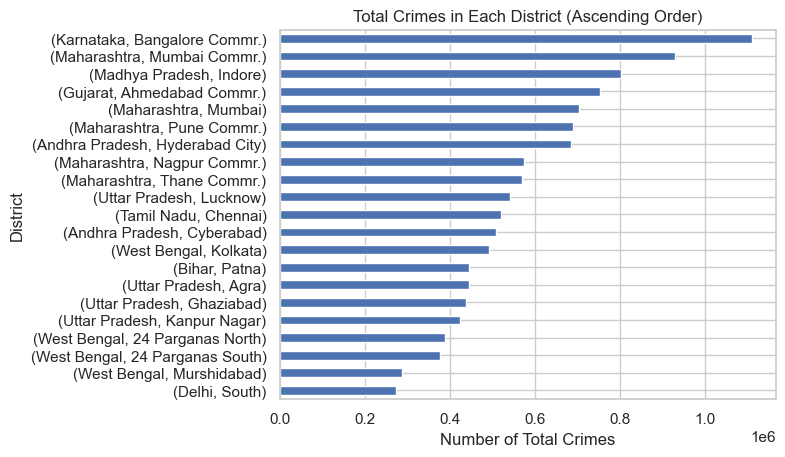

In [601]:
# Create a pivot table for 'Total crimes' column
pivot_table = pd.pivot_table(Sensitive_District, values='Total Crimes', index=['State/ UT', 'District'], aggfunc='sum')

# Sort the pivot table based on 'Murder' in ascending order
pivot_table = pivot_table.sort_values(by='Total Crimes', ascending=True)

# Print the result
print("Pivot Table for Total Crimes' (Ascending Order):")
print(pivot_table)


# Plotting the bar chart
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='barh', legend=False)
plt.title('Total Crimes in Each District (Ascending Order)')
plt.xlabel('Number of Total Crimes')
plt.ylabel('District')
plt.show()

# 4.3.1

# Final Report :

# 1. What is impacting more crimes in sensitive areas. 

What is impacting more crimes in sensitive areas?

There are many factors that can influence the rate of crime in sensitive areas. Some of these factors are:

Poverty and Population: People who is lack of economic opportunities or face financial hardships may resort to illegal activities to survive or cope up with their situation.

Social exclusion and marginalization: People who feel discriminated against or isolated from the mainstream society may develop resentment or anger towards the dominant groups or institutions, and may express their frustration through violence or vandalism. 

Lack of education and Unemployment: People who have low levels of education or literacy may have limited access to information or resources that can help them improve their lives or resolve their problems peacefully. They may also have less awareness of the consequences of their actions or the rights of others. EX:...

Drug and alcohol abuse: People who abuse substances may impair their judgment or lose control of their impulses, and may engage in risky or aggressive behavior that can harm themselves or others.

Cultural and religious conflicts: People who have different beliefs, values, or customs from the majority may face intolerance or hostility from others, and may feel threatened or provoked by the differences. This can lead to clashes or disputes that can escalate into violence or hate crimes.

# 2. What needs to be done to reduce crime

What needs to be done to reduce crime?


Reducing crime is a complex and challenging issue that requires multiple strategies and interventions. Some possible points to consider are:

Improving social and economic conditions such as poverty, unemployment, education, inequality, discrimination, Social justice. etc.

Strengthening the criminal justice system to ensure that it is fair, effective, and accountable, and that it respects the human rights of both victims and offenders.

Promoting a culture of respect for the law and human dignity, and encouraging civic engagement and participation in community affairs.

Enhancing better surveillance, intelligence, and cooperation among different inestigative agencies.

# 3. Most safe and unsafe districts.

# Sensitive_area_data: Observation

Sensitive_area_data Total crime:

Observation :Overall Total crime of Sensitive disticts: Unsafe districts

The top 6 states and districts with the highest number of Total crimes cases are Karnataka (Bangalore Commissionerate)-total crime459437, Maharashtra(Mumbai Commr)- total crime 310755,Gujarat (Ahmedabad Commr) total crime-278467,Andhra Pradesh (Hyderabad City) - total crime 261276,Madhya Pradesh (Indore)  total crime -247160,West Bengal(Kolkata) total crime-201713.
so these are unsafe districts.


Observation :Overall Total crime of Peaceful area disticts:Most safe districts:

The top 6 states and districts with the low number of Total crmies cases are Jammu & Kashmir(Railways Katra) total crime -4,Manipur(Cid) total crime -9,Tripura(G.R.P) total crime-9,Jammu & Kashmir(Railways Kmr)-10,Himachal Pradesh(Cid)-15
so these are Most safe districts




Individual observation:

Observations on Muder Cases: 

The top 5 states and districts with the highest number of Murder cases are Bihar(Patn) total crime-4586,Karnataka (Bangalore Commissionerate)- 2831, West Bengal (24 Parganas North and 24 Parganas South)-2329, Uttar Pradesh (Ghaziabad)2227, and West Bengal 24 Parganas South)-2114 , so these are unsafe districts.

The top 5 states and 5 districts with the low number of Murder cases are, West Bengal (Kolkata)-596, Delhi (South)-713,Maharashtra (Nagpur Commr)-1175,Gujarat (Ahmedabad Commr)-1204,Maharashtra(Mumbai)-1254so these are Most safe districts.


Observations on Rape Cases:

The top states and districts with the highest number of Rape cases are West Bengal (Murshidabad-3352,Parganas South-2221,24 Parganas North -1883 and 24 ),Maharashtra(Mumbai Commr)-1386,  Madhya Pradesh (Indore)-1255,Maharashtra (Pune Commr.)-846,Delhi(South)           839 so these are unsafe districts.

The top 5 states and 5 districts with the least number of Rape cases are Uttar Pradesh (Ghaziabad)-357,
West Bengal (Kolkata)-433 ,Uttar Pradesh(Kanpur Nagar-492 ,Agra-493), Gujarat(Ahmedabad Commr-506,),Tamil Nadu (Chennai)-531 so theses are Most safe districts



Observations on Kidnapping & Abduction:


The top states and districts with the highest number of Kidnapping & Abduction cases are in Bihar(Patna)-3502,West Bengal (24 Parganas North- 3311 )Karnataka(Bangalore Commr)- 3014,West Bengal(Murshidabad)-2943,Uttar Pradesh Agra-2541 ,Kanpur Nagar-2636 ,Lucknow-2914) Delhi(South)-2390so these are unsafe districts.

The top 5 states and districts with the least number of Kidnapping & Abduction cases are in Madhya Pradesh (Indore)-625, Tamil Nadu Chennai Tamil Nadu(Chennai)-627 ,Maharashtra(Nagpur Commr-646,Mumbai-793,Thane Commr-1046,Pune Commr-1087,Mumbai Commr-1334),Andhra Pradesh (Cyberabad-1398,Hyderabad City -1466),West Bengal(Kolkata)-1534 so these are Most safe districts


Observations on Robbery:

The top 5 states and districts with the highest number of Robbery cases are in Karnataka (Bangalore Commr)-6740, Gujarat(Ahmedabad Commr)-5292, Bihar(Patna)-4901 , Maharashtra(Thane Commr-2539,Nagpur Commr-2963,Mumbai Commr-3209,Pune Commr)-3667,Madhya Pradesh(Indore)-2326, Maharashtra Mumbai)-1600 so these are unsafe districts.

The top 5 states and districts with the least number of Robbery cases are in West Bengal (Murshidabad-391,24 Parganas South-392, 24 Parganas North-739), Andhra Pradesh (Cyberabad)-765,Delhi(South)-798,Andhra Pradesh (Hyderabad City-942),West Bengal(Kolkata)- 1007 so these are Most safe districts
    

# Sensitive_area_data Total crime:

Pivot Table for Total Crimes (Ascending Order):
                                  Total Crimes
State/ UT      District                       
Uttar Pradesh  Kanpur Nagar              91225
               Ghaziabad                 98572
West Bengal    Murshidabad               99817
Uttar Pradesh  Agra                     101746
Maharashtra    Thane Commr.             130500
               Nagpur Commr.            133110
Delhi          South                    136324
West Bengal    24 Parganas South        143768
               24 Parganas North        149975
Uttar Pradesh  Lucknow                  150796
Andhra Pradesh Cyberabad                173447
Bihar          Patna                    175558
Maharashtra    Pune Commr.              190804
Tamil Nadu     Chennai                  195004
Maharashtra    Mumbai                   198320
West Bengal    Kolkata                  201713
Madhya Pradesh Indore                   247160
Andhra Pradesh Hyderabad City           261276
Gujarat     

<Figure size 1200x800 with 0 Axes>

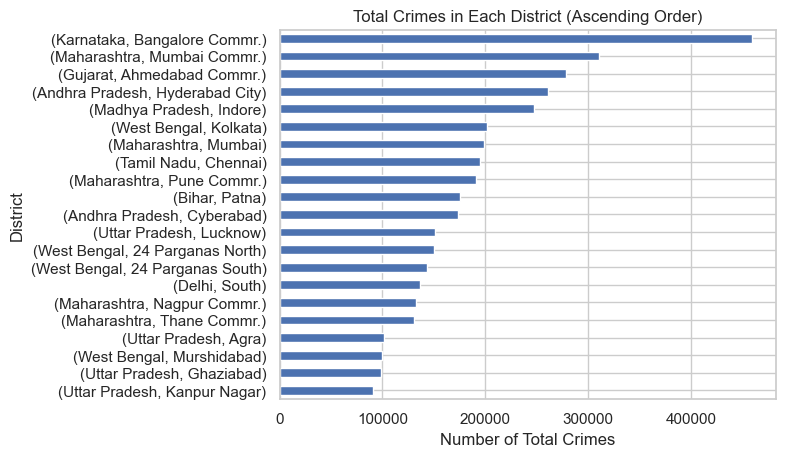

In [583]:
# Calculate total crimes for each district
Sensitive_District['Total Crimes'] = Sensitive_District[crime_columns].sum(axis=1)

# Create a pivot table for 'Murder' column
pivot_table = pd.pivot_table(Sensitive_District, values='Total Crimes', index=['State/ UT', 'District'], aggfunc='sum')

# Sort the pivot table based on 'Total Crimes' in ascending order
pivot_table = pivot_table.sort_values(by='Total Crimes', ascending=True)

# Print the result
print("Pivot Table for Total Crimes (Ascending Order):")
print(pivot_table)

# Plotting the bar chart
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='barh', legend=False)
plt.title('Total Crimes in Each District (Ascending Order)')
plt.xlabel('Number of Total Crimes')
plt.ylabel('District')
plt.show()

Observation: 

The top 6 states and districts with the highest number of Total crimes cases are Karnataka (Bangalore Commissionerate), Maharashtra(Mumbai Commr),Gujarat (Ahmedabad Commr),Andhra Pradesh (Hyderabad City),Madhya Pradesh (Indore),West Bengal    (Kolkata)so these are unsafe districts.

The top 6 states and districts with the low number of Total crmies cases are Uttar Pradesh (Kanpur Nagar,Ghaziabad ),West Bengal (Murshidabad),Uttar Pradesh(Agra),Maharashtra(Thane Commr,Nagpur Commr )Delhi(South)so these are Most safe districts


Pivot Table for Total Crimes' (Ascending Order):
                                  Total Crimes
State/ UT      District                       
Delhi          South                    274134
West Bengal    Murshidabad              288388
               24 Parganas South        376290
               24 Parganas North        388704
Uttar Pradesh  Kanpur Nagar             423380
               Ghaziabad                438074
               Agra                     444422
Bihar          Patna                    445281
West Bengal    Kolkata                  492180
Andhra Pradesh Cyberabad                509871
Tamil Nadu     Chennai                  520068
Uttar Pradesh  Lucknow                  542522
Maharashtra    Thane Commr.             568715
               Nagpur Commr.            573935
Andhra Pradesh Hyderabad City           685529
Maharashtra    Pune Commr.              689323
               Mumbai                   704355
Gujarat        Ahmedabad Commr.         752960
Madhya Prad

<Figure size 1200x800 with 0 Axes>

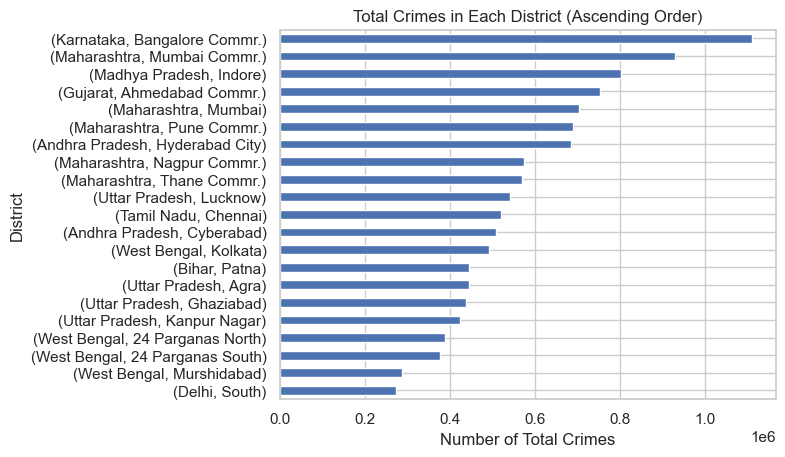

In [642]:
# Create a pivot table for 'Total crimes' column
pivot_table = pd.pivot_table(Sensitive_District, values='Total Crimes', index=['State/ UT', 'District'], aggfunc='sum')

# Sort the pivot table based on 'Murder' in ascending order
pivot_table = pivot_table.sort_values(by='Total Crimes', ascending=True)

# Print the result
print("Pivot Table for Total Crimes' (Ascending Order):")
print(pivot_table)


# Plotting the bar chart
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='barh', legend=False)
plt.title('Total Crimes in Each District (Ascending Order)')
plt.xlabel('Number of Total Crimes')
plt.ylabel('District')
plt.show()

# 4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

Analysis of Population vs Overall Crime: 

When comparing more populated states, it is observed that states with higher populations tend to have higher crime rates as well. For instance:

Maharashtra, with a population of 112,374,333, has a total crime count of 414,639.

Uttar Pradesh, with a population of 199,812,341, reports a total crime count of 348,726.

Andhra Pradesh, with a population of 49,386,799, reports a total crime count of 252,061.

Rajasthan, with a population of 68,548,437, records a total crime count of 213,319.

Madhya Pradesh, with a population of 72,626,809, has a total crime count of 212,373.

West Bengal, with a population of 91,276,115, reports a total crime count of 203,104.



Analysis of Literacy Rate vs Total Crimes:

If Literacy Rate 2011 is between 90% and 95%, the crime rate is very low, typically ranging from 0 to 100,000. For example, in Kerala, with a literacy rate of 94.0%, the crime rate is 89,171. Similarly, in Mizoram with a literacy rate of 91.3%, the crime rate is 5,532.

In the case where the Literacy Rate is between 65% and 70%, the crime rates are higher, typically around 400,000. For instance, in Jammu & Kashmir with a literacy rate of 67.2%, the crime rate is 32,520. Jharkhand, with a literacy rate of 66.4%, has a crime rate of 61,159. Uttar Pradesh, with a literacy rate of 67.7%, reports a crime rate of 348,726.

When the Literacy Rate ranges between 75% and 80%, the crime rates tend to be up to 2 lakhs, usually falling within the range of 0 to 200,000. An example is Dadra & Nagar Haveli, with a literacy rate of 76.2% and a corresponding crime rate of 649.

The top 6 states unsafe districts:

The top 6 states unsafe districts with the highest number of Total crimes cases are Karnataka (Bangalore Commissionerate) literacy rate is 75.4 total crime 4,59437

Maharashtra (Mumbai Commr) has literacy rate is 82.3 and population 414639- total crime 310755

Gujarat (Ahmedabad Commr) literacy rate is 78.0 and population 129857- total crime-2,78,467

Andhra Pradesh (Hyderabad City) population is 4,93,86,799, literacy rate is 67.0 - total very less and total crime 2,61,276

Madhya Pradesh (Indore)literacy rate is 69.3, population is 7,26,26,809 and total crime -2,47,160

West Bengal (Kolkata) population is 9,12,76,115, literacy rate is 76.3 and total crime-201713. 

so, these are unsafe districts.



Observation: Peaceful area Most safe districts:

The top 6 states and districts with the low number of Total crimes 
cases are 

Jammu & Kashmir (Railways Katra) literacy rate is 67.2, total crime -4,

Manipur (Cid) literacy rate is 76.9 and total crime -9,

Tripura (G.R.P) literacy rate is 87.2 and total crime-9,

Jammu & Kashmir (Railways Kmr) literacy rate is 67.2 -10,

Himachal Pradesh (Cid) literacy rate is 82.8 and crime rate are 15 
so these are Most safe districts


# End.........................Thank you